## 1. Importing the necessary libraries

In [53]:
import os
import math
import re
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import(
    OneHotEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler
)

from sklearn.metrics import(
    r2_score,
    accuracy_score,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    recall_score

)

from sklearn.linear_model import(
    LinearRegression,
    LogisticRegression,
    Lasso,
    Ridge,
    ElasticNet
)

from sklearn.tree import(
    DecisionTreeClassifier,
    DecisionTreeRegressor
)

from sklearn.ensemble import(
    RandomForestClassifier,
    RandomForestRegressor
)

from sklearn.model_selection import(
    train_test_split
)

from sklearn.naive_bayes import(
    GaussianNB
)

from sklearn.svm import(
    SVC,
    SVR
)

from scipy import stats

### 2. Data Loading

In [54]:
path  = os.path.join('Dataset','students_data.csv')
df=pd.read_csv(path)

### 3. Basic Initial Inspection

In [55]:
df.head()

sex   age address      FamilySize ParentStatus      MotherEducation  \
0   F  18.0   Urban  Greater_Than_3        Apart     higher_education   
1   F  17.0   Urban  Greater_Than_3     Together    primary_education   
2   F  15.0   Urban    Less_Equal_3     Together    primary_education   
3   F  15.0     NaN  Greater_Than_3     Together     higher_education   
4   F  16.0   Urban  Greater_Than_3     Together  secondary_education   

       FatherEducation MotherJob FatherJob  reason  ... FamilyRelation  \
0     higher_education   at_home   teacher  course  ...      very_good   
1    primary_education   at_home     other  course  ...      excellent   
2    primary_education   at_home     other   other  ...      very_good   
3      lower_secondary    health  services    home  ...           good   
4  secondary_education     other     other    home  ...      very_good   

  freetime Hangout  DailyAlcoholConsumption WeekendAlcoholConsumption  \
0   medium    high                 very_low                  very_low   
1   medium  medium                 very_low                  very_low   
2   medium     low                      low                    medium   
3      low     low                 very_low                  very_low   
4   medium     low                 very_low                       low   

      health absences finalmarks final_marks_in_percentage finalgrades  
0       good      6.0          6                      30.0         1.2  
1       good      NaN          6                      30.0         1.2  
2       good     10.0         10                      50.0         2.0  
3  excellent      2.0         15                      75.0         3.0  
4  excellent      NaN         10                      50.0         2.0  

[5 rows x 32 columns]

### Handling Missing values

In [56]:
df.isnull()

sex    age  address  FamilySize  ParentStatus  MotherEducation  \
0    False  False    False       False         False            False   
1    False  False    False       False         False            False   
2    False  False    False       False         False            False   
3    False  False     True       False         False            False   
4    False  False    False       False         False            False   
..     ...    ...      ...         ...           ...              ...   
390  False  False    False       False         False            False   
391  False  False    False       False         False            False   
392  False  False    False       False         False            False   
393  False  False    False       False         False            False   
394  False  False    False       False         False            False   

     FatherEducation  MotherJob  FatherJob  reason  ...  FamilyRelation  \
0              False      False      False   False  ...           False   
1              False      False      False   False  ...           False   
2              False      False      False   False  ...           False   
3              False      False      False   False  ...           False   
4              False      False      False   False  ...           False   
..               ...        ...        ...     ...  ...             ...   
390            False      False      False   False  ...           False   
391            False      False      False   False  ...           False   
392            False      False      False   False  ...           False   
393            False      False      False   False  ...           False   
394            False      False      False   False  ...           False   

     freetime  Hangout  DailyAlcoholConsumption  WeekendAlcoholConsumption  \
0       False    False                    False                      False   
1       False    False                    False                      False   
2       False    False                    False                      False   
3       False    False                    False                      False   
4       False    False                    False                      False   
..        ...      ...                      ...                        ...   
390     False    False                    False                      False   
391     False    False                    False                      False   
392     False    False                    False                      False   
393     False    False                    False                      False   
394     False    False                    False                      False   

     health  absences  finalmarks  final_marks_in_percentage  finalgrades  
0     False     False       False                      False        False  
1     False      True       False                      False        False  
2     False     False       False                      False        False  
3     False     False       False                      False        False  
4     False      True       False                      False        False  
..      ...       ...         ...                        ...          ...  
390   False     False       False                      False        False  
391   False     False       False                      False        False  
392   False     False       False                      False        False  
393   False     False       False                      False        False  
394   False     False       False                      False        False  

[395 rows x 32 columns]

In [57]:
df.isnull().sum()

sex                          0
age                          3
address                      2
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     3
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

In [58]:
df.isnull().sum()>0

sex                          False
age                           True
address                       True
FamilySize                   False
ParentStatus                 False
MotherEducation              False
FatherEducation              False
MotherJob                    False
FatherJob                    False
reason                       False
guardian                     False
traveltime_in_min            False
studytime_in_hrs             False
no_of_failures               False
SchoolSupport                False
FamilySupport                False
ExtraPaidClasses             False
activities                   False
nursery                      False
higher                       False
internet                     False
romantic                     False
FamilyRelation               False
freetime                     False
Hangout                      False
DailyAlcoholConsumption      False
WeekendAlcoholConsumption    False
health                       False
absences            

In [59]:
missing_info={}
for col in df.columns:
    if df[col].isnull().sum()>0:
        missing_count=((df[col].isnull().sum())/len(df)*100)
        missing_info[col]=round(missing_count,2)
print("The columns with their Missing values are:")

for col,perc in missing_info.items():
    print(f'{col}:{perc}%')

The columns with their Missing values are:
age:0.76%
address:0.51%
absences:0.76%


In [60]:
numerical_columns=df.select_dtypes(include=['number']).columns
df[numerical_columns].head()

age  no_of_failures  absences  finalmarks  final_marks_in_percentage  \
0  18.0               0       6.0           6                       30.0   
1  17.0               0       NaN           6                       30.0   
2  15.0               3      10.0          10                       50.0   
3  15.0               0       2.0          15                       75.0   
4  16.0               0       NaN          10                       50.0   

   finalgrades  
0          1.2  
1          1.2  
2          2.0  
3          3.0  
4          2.0

### Box-plot for the Missing columns

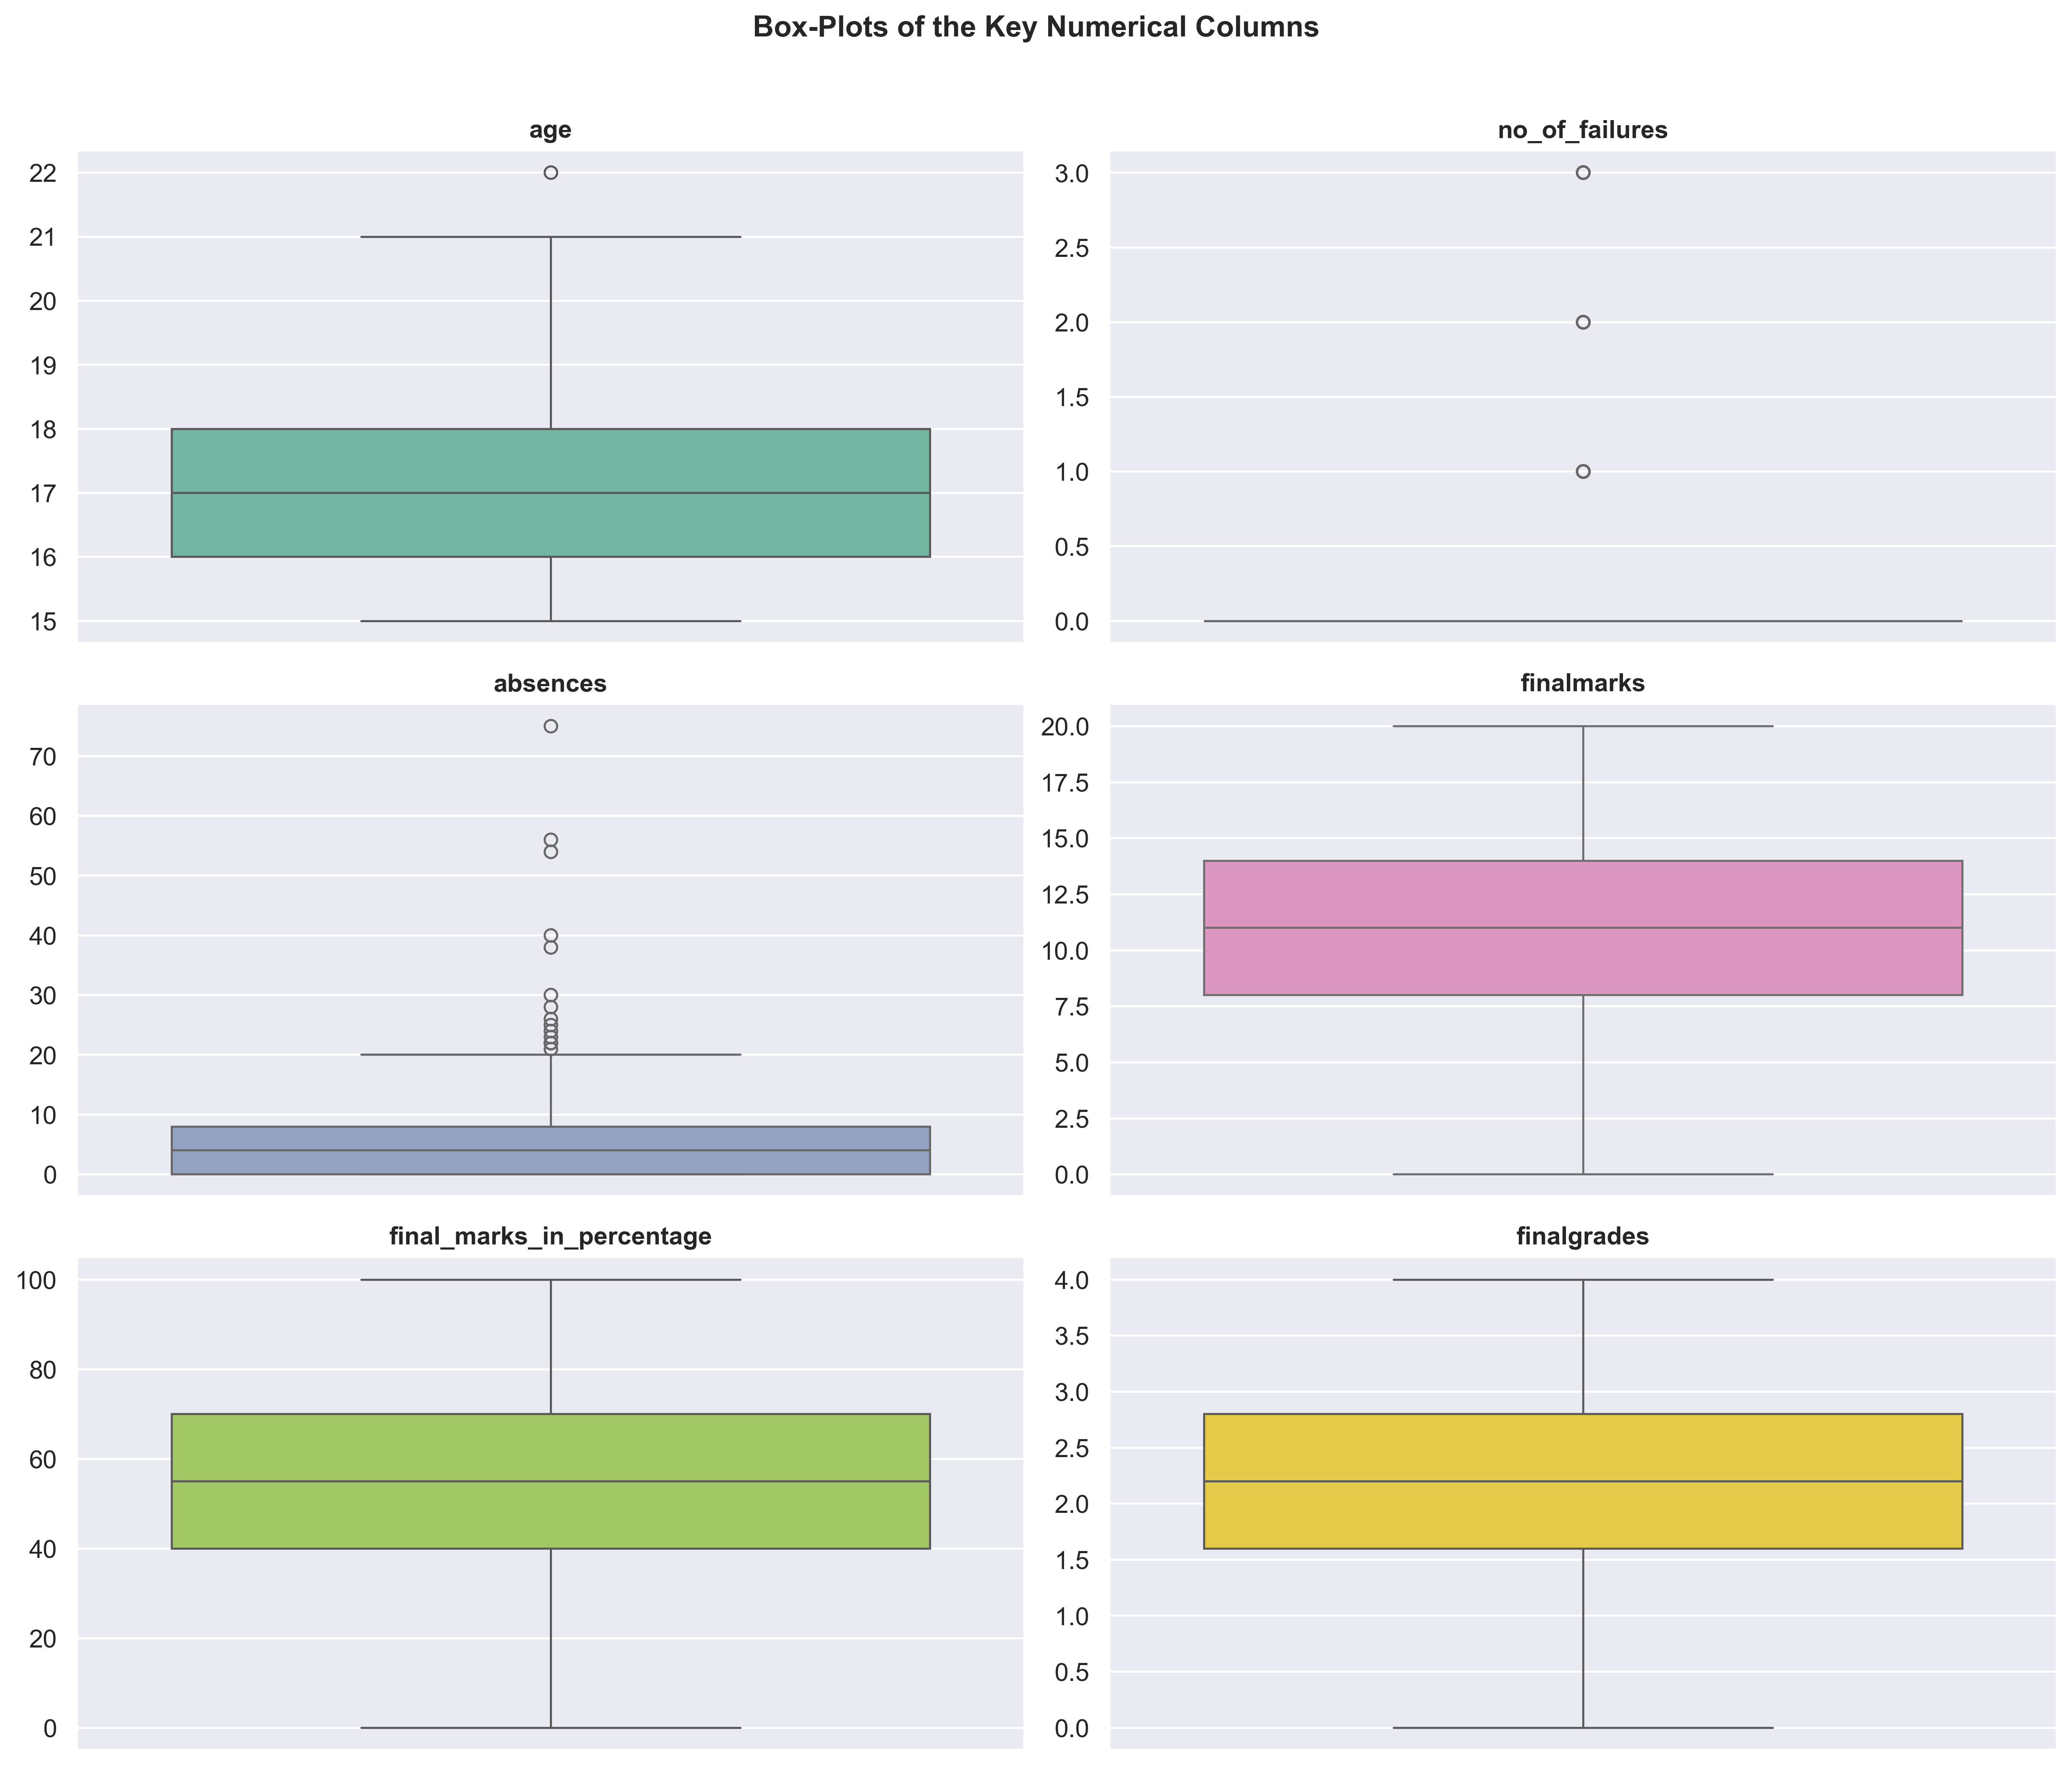

In [61]:
sns.set(style='darkgrid', palette='hls', font_scale=1.1)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), dpi=350)
axes = axes.flatten()

colors = sns.color_palette("Set2", n_colors=len(numerical_columns))

for idx, column in enumerate(numerical_columns):
    sns.boxplot(
        y=df[column],
        ax=axes[idx],
        color=colors[idx]
    )
    axes[idx].set_title(column, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")


for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle(
    "Box-Plots of the Key Numerical Columns",
    fontsize=14,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [62]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())

In [63]:
categorical_columns=df.select_dtypes(exclude=['number']).columns

df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [64]:
df.isnull().sum()

sex                          0
age                          0
address                      0
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     0
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

### Pie Chart for Categorical Data

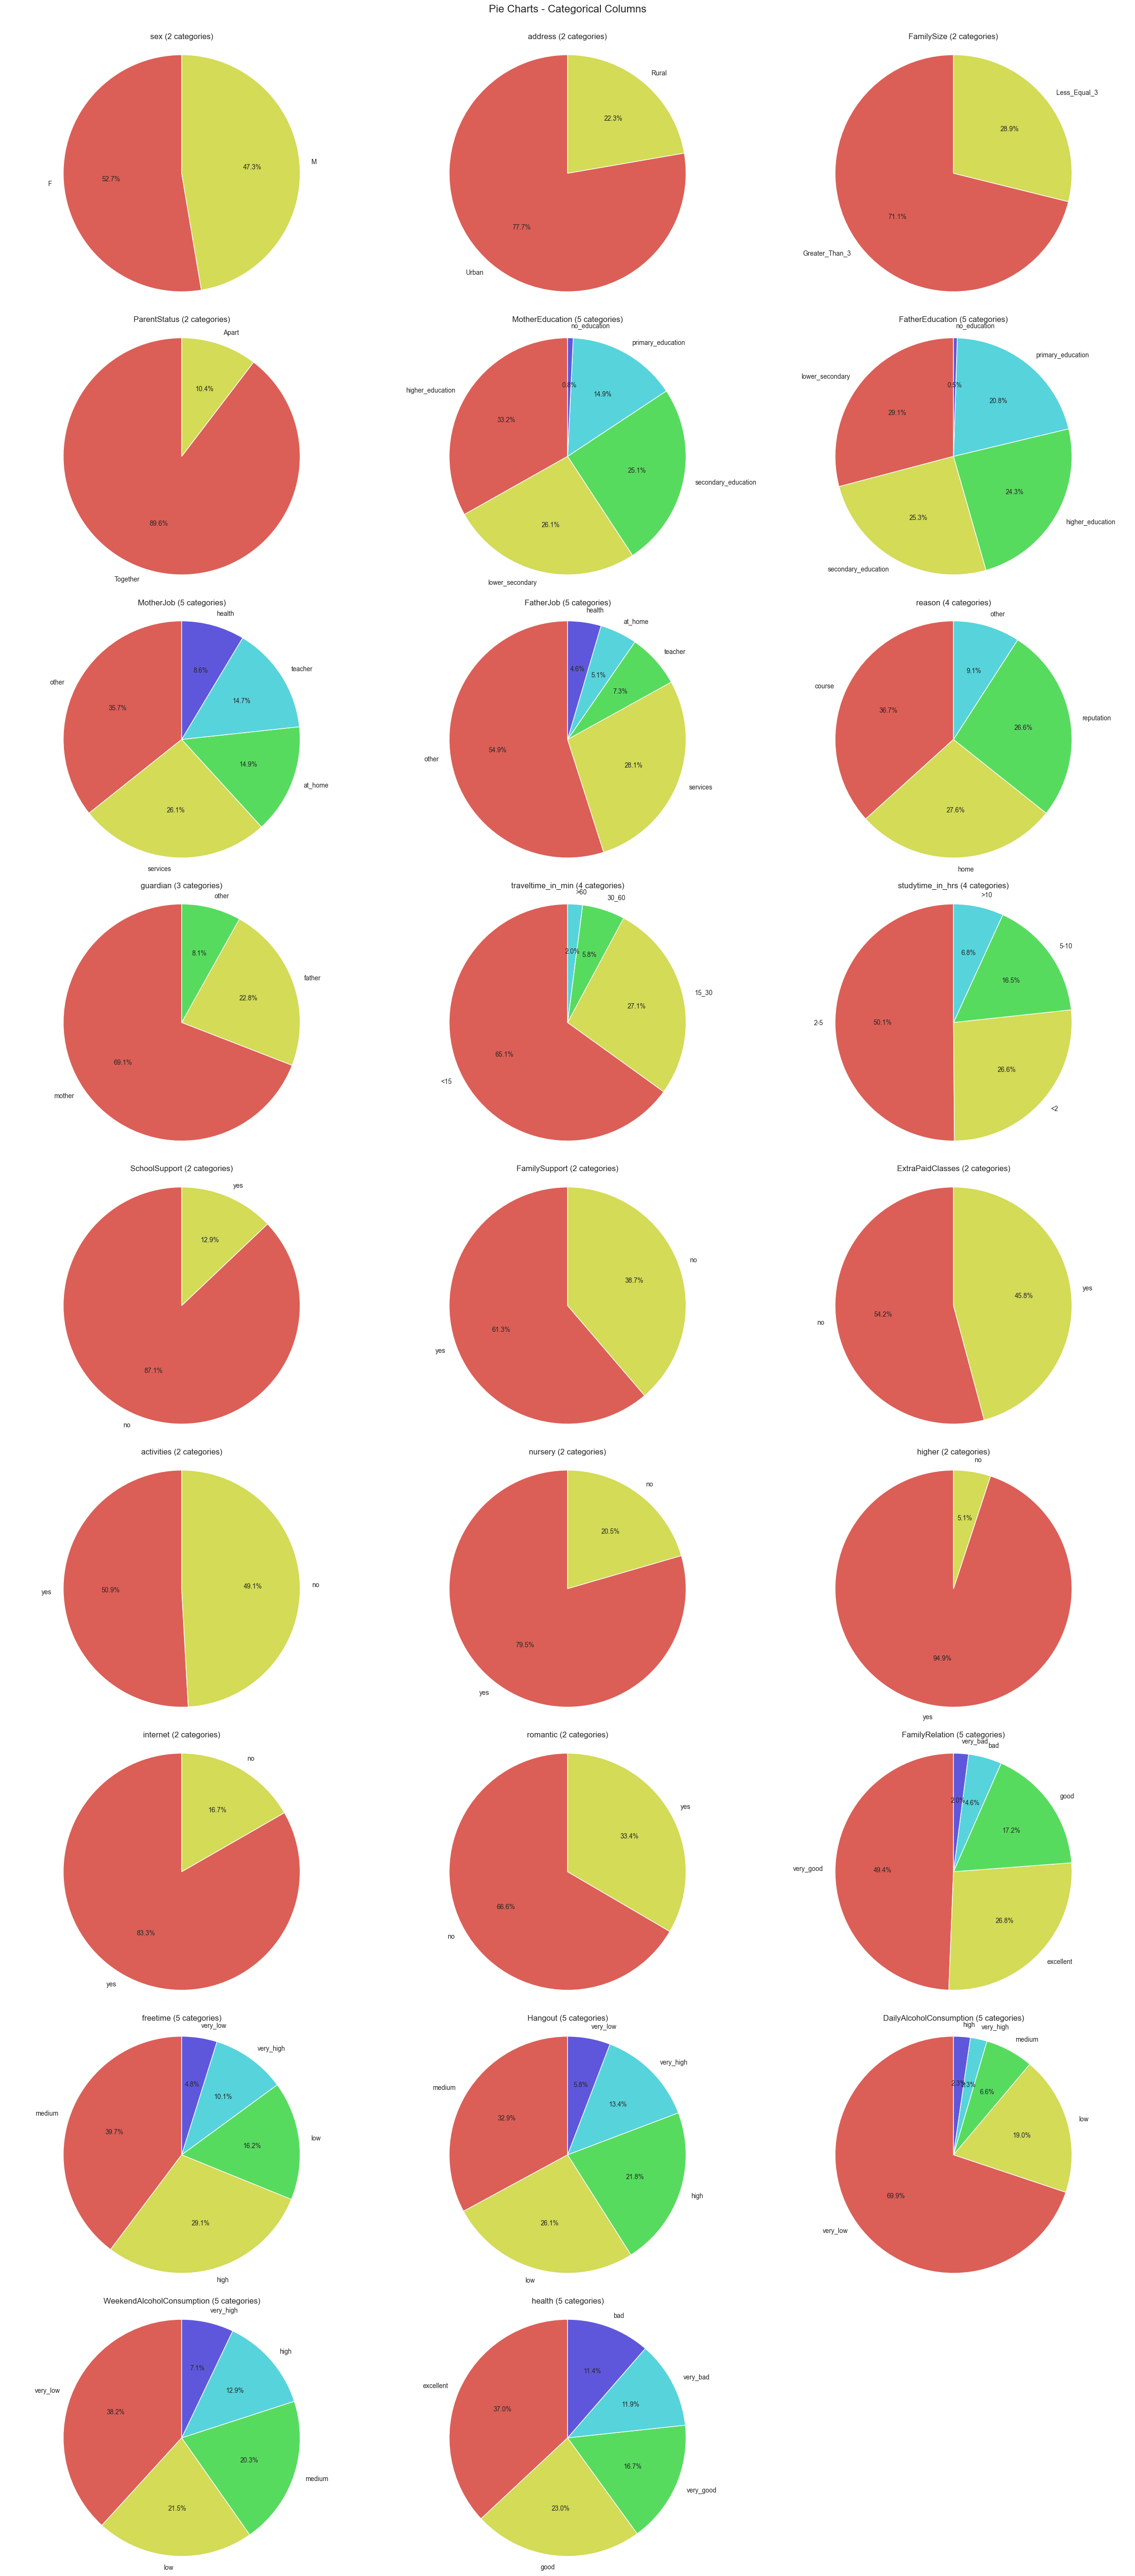

In [65]:
if len(categorical_columns) > 0:
    n_cols = min(3, len(categorical_columns))
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    if len(categorical_columns) == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    for idx, col in enumerate(categorical_columns):
        value_counts = df[col].value_counts()
        font_size = max(6, 10 - len(value_counts) * 0.05)
        
        axes[idx].pie(value_counts.values, labels=value_counts.index, 
                     autopct='%1.1f%%', startangle=90, 
                     textprops={'fontsize': font_size})
        axes[idx].set_title(f'{col} ({len(value_counts)} categories)', fontsize=12)
        axes[idx].axis('equal')
    
    # Hide empty subplots
    for idx in range(len(categorical_columns), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Pie Charts - Categorical Columns', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()

### Pie Chart for Numerical Data

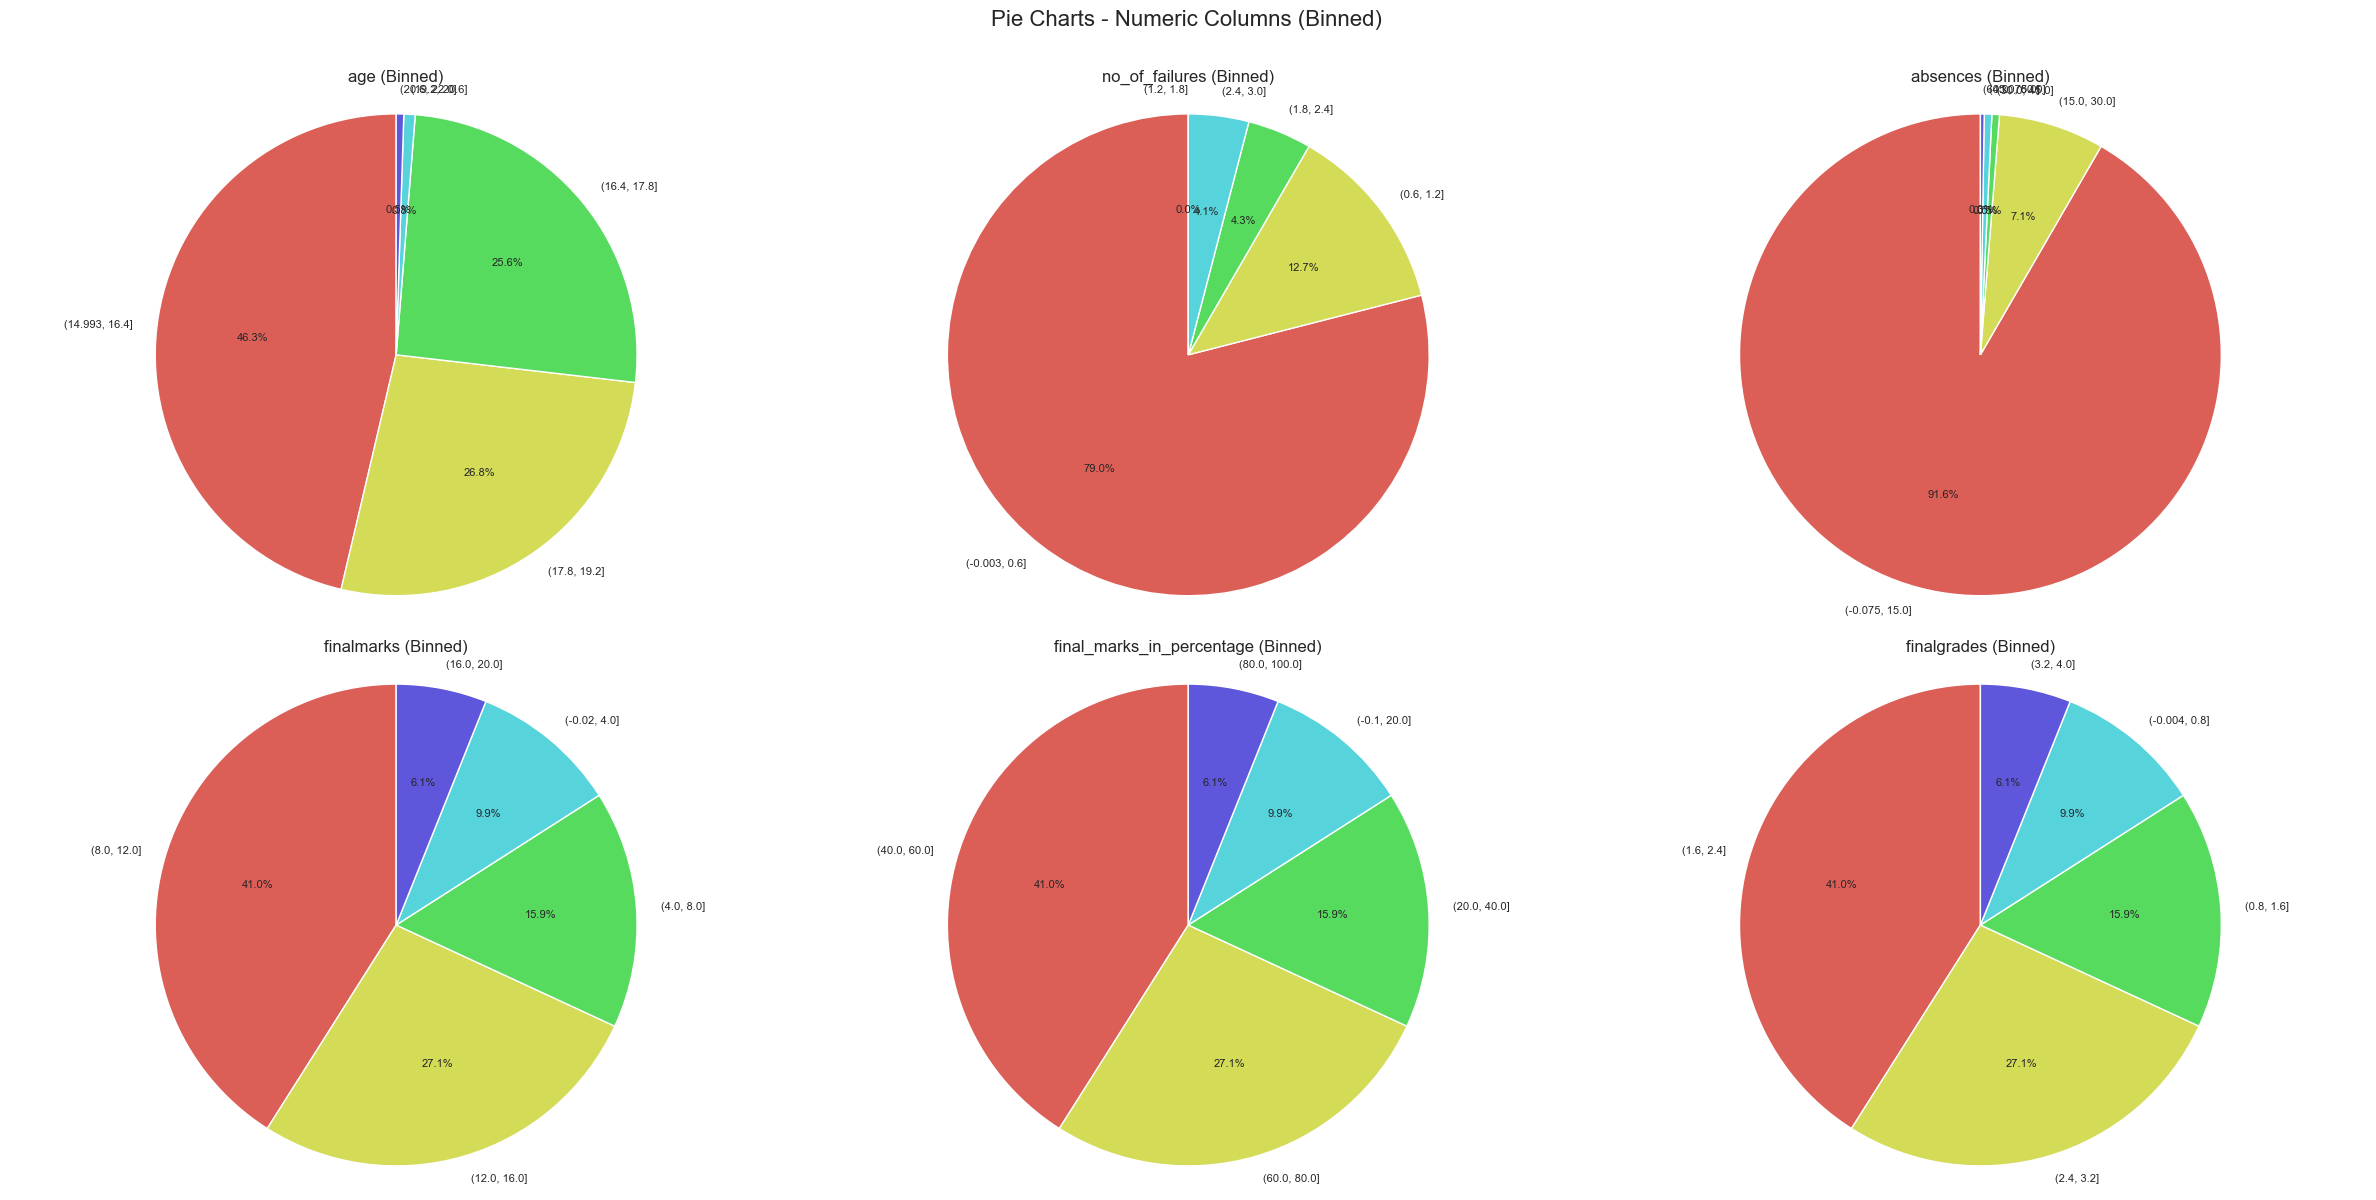

In [66]:
if len(numerical_columns) > 0:
    n_cols = min(3, len(numerical_columns))
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    if len(numerical_columns) == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    for idx, col in enumerate(numerical_columns):
        binned_data = pd.cut(df[col], bins=5)
        value_counts = binned_data.value_counts()
        
        axes[idx].pie(value_counts.values, labels=value_counts.index, 
                     autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
        axes[idx].set_title(f'{col} (Binned)', fontsize=12)
        axes[idx].axis('equal')
    
    # Hide empty subplots
    for idx in range(len(numerical_columns), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Pie Charts - Numeric Columns (Binned)', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()


### Hexbin Plot

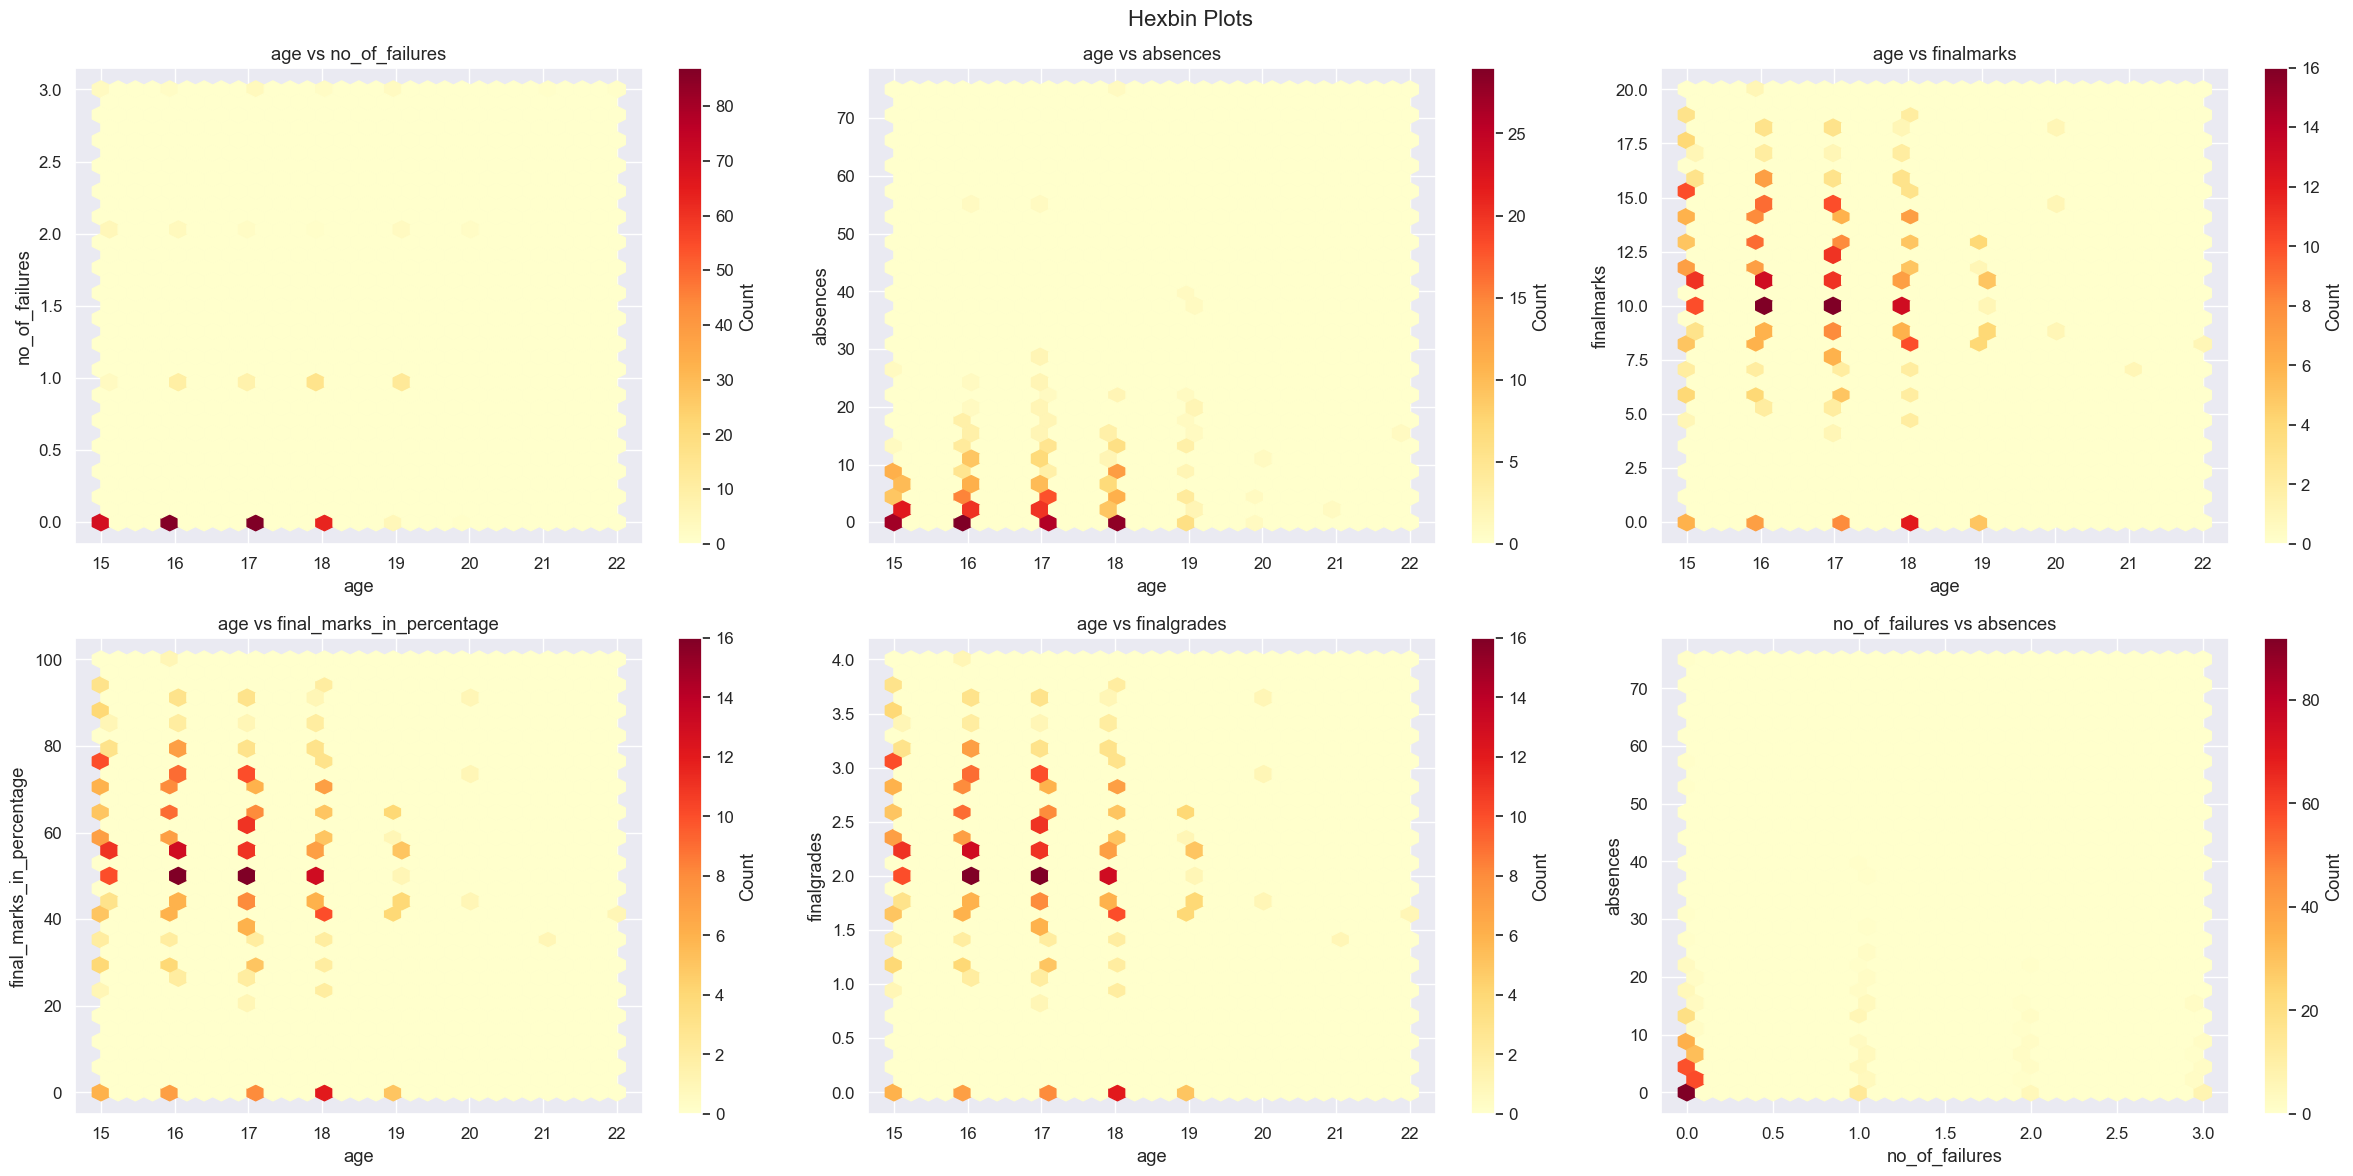

In [67]:
if len(numerical_columns) >= 2:
    # Create hexbin for multiple pairs
    n_plots = min(6, len(numerical_columns) * (len(numerical_columns) - 1) // 2)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    plot_idx = 0
    for i in range(len(numerical_columns)):
        for j in range(i+1, len(numerical_columns)):
            if plot_idx >= n_plots:
                break
            
            hb = axes[plot_idx].hexbin(df[numerical_columns[i]], df[numerical_columns[j]], 
                                       gridsize=30, cmap='YlOrRd')
            axes[plot_idx].set_xlabel(numerical_columns[i])
            axes[plot_idx].set_ylabel(numerical_columns[j])
            axes[plot_idx].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
            plt.colorbar(hb, ax=axes[plot_idx], label='Count')
            plot_idx += 1
        if plot_idx >= n_plots:
            break
    
    # Hide empty subplots
    for idx in range(plot_idx, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Hexbin Plots', fontsize=16)
    plt.tight_layout()
    plt.show()

### Correlation Matrix

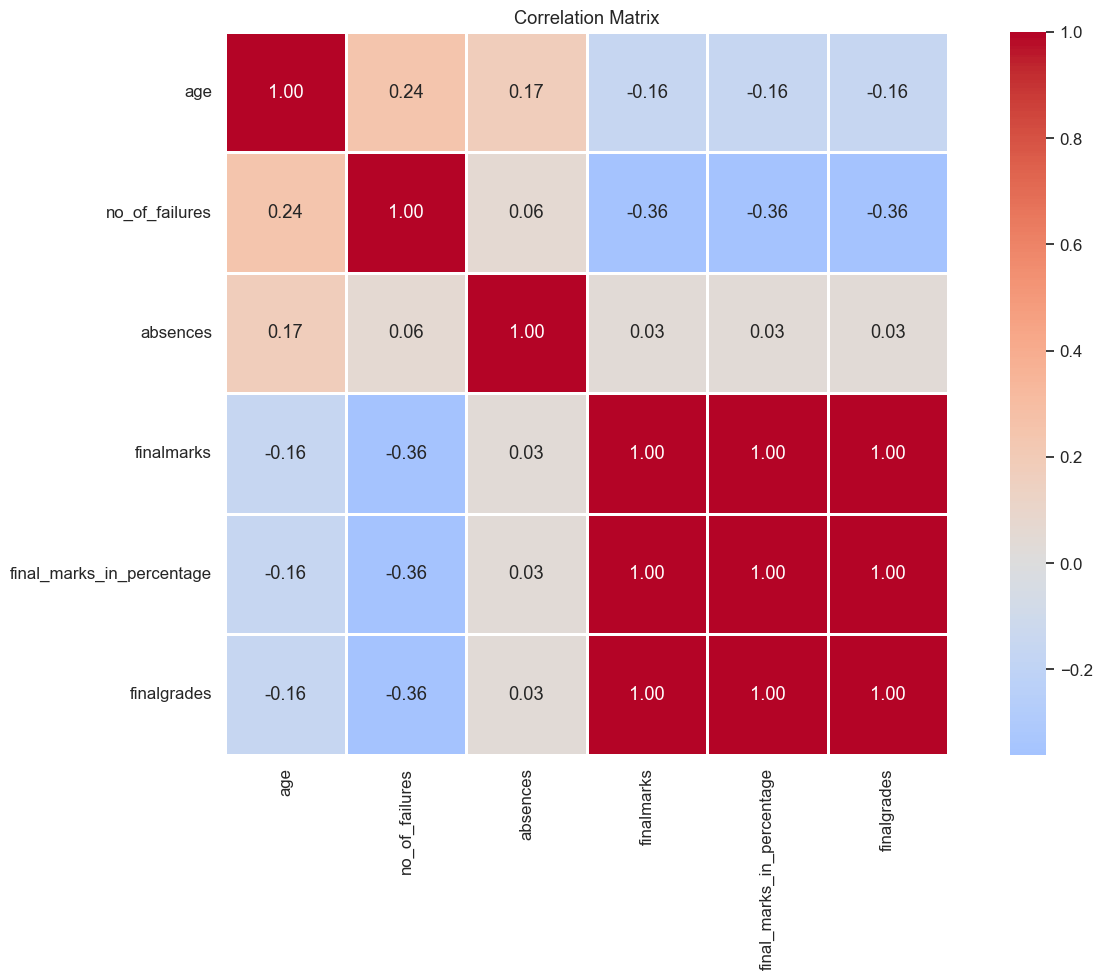

In [68]:
if len(numerical_columns) >= 2:
    plt.figure(figsize=(14, 10))
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

### Contour Plot

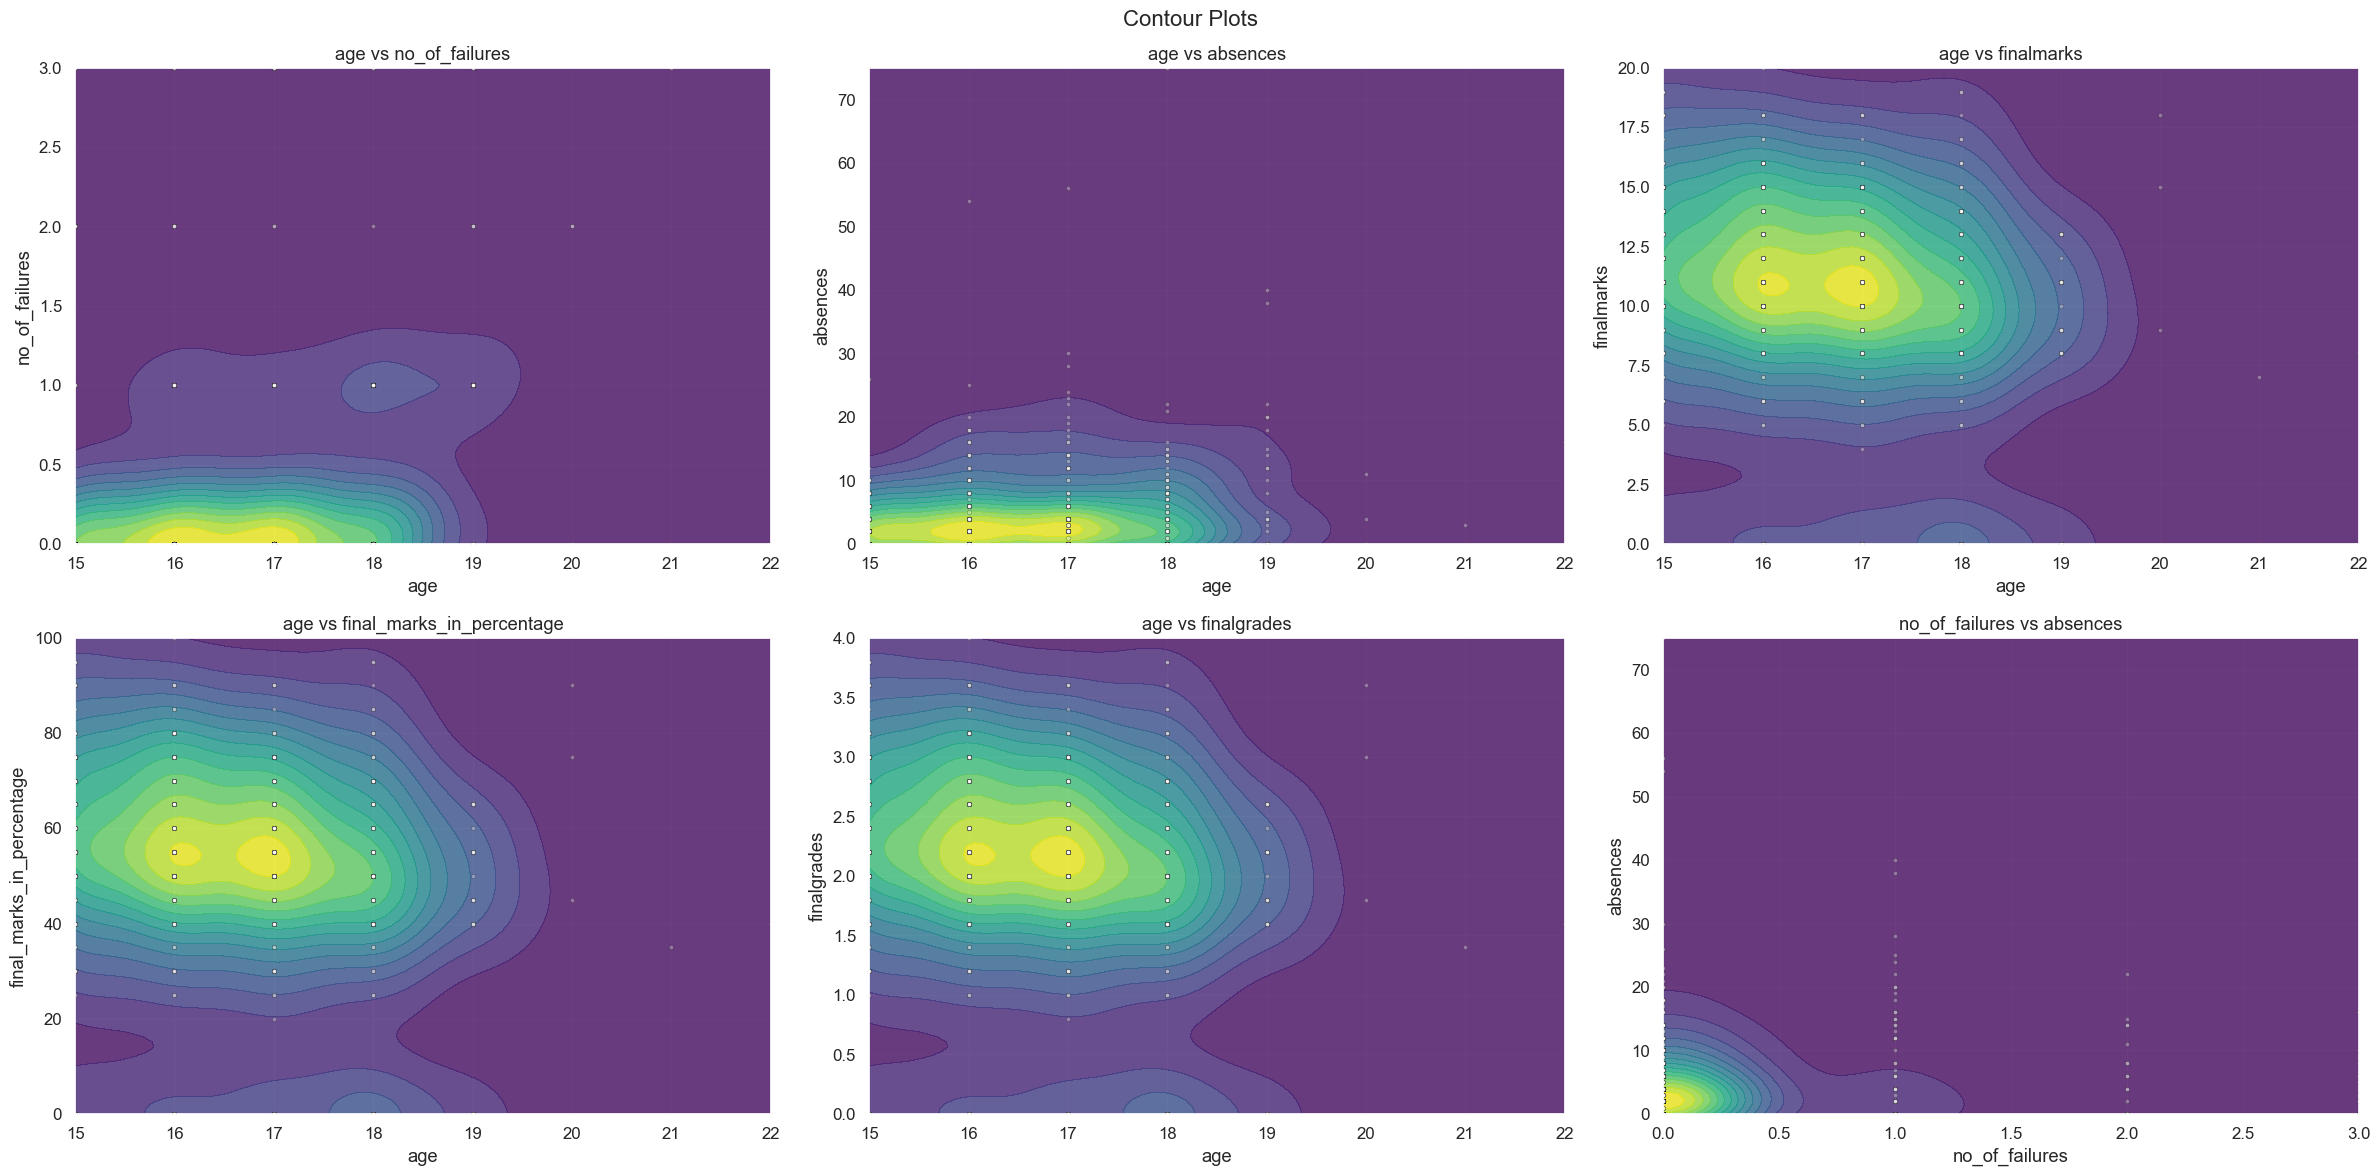

✓ Contour plots complete!


In [69]:
if len(numerical_columns) >= 2:
    n_plots = min(6, len(numerical_columns) * (len(numerical_columns) - 1) // 2)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    axes_flat = axes.flatten() if n_plots > 1 else [axes]
    
    plot_idx = 0
    for i in range(len(numerical_columns)):
        for j in range(i+1, len(numerical_columns)):
            if plot_idx >= n_plots:
                break
            
            # Get valid data
            valid_idx = df[[numerical_columns[i], numerical_columns[j]]].dropna().index
            x = df.loc[valid_idx, numerical_columns[i]]
            y = df.loc[valid_idx, numerical_columns[j]]
            
            if len(x) > 10:
                xmin, xmax = x.min(), x.max()
                ymin, ymax = y.min(), y.max()
                
                xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
                positions = np.vstack([xx.ravel(), yy.ravel()])
                values = np.vstack([x, y])
                kernel = stats.gaussian_kde(values)
                zz = np.reshape(kernel(positions).T, xx.shape)
                
                axes_flat[plot_idx].contourf(xx, yy, zz, levels=15, cmap='viridis', alpha=0.8)
                axes_flat[plot_idx].scatter(x, y, c='white', s=10, alpha=0.3, edgecolors='black', linewidth=0.5)
                axes_flat[plot_idx].set_xlabel(numerical_columns[i])
                axes_flat[plot_idx].set_ylabel(numerical_columns[j])
                axes_flat[plot_idx].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
            
            plot_idx += 1
        if plot_idx >= n_plots:
            break
    
    # Hide empty subplots
    for idx in range(plot_idx, len(axes_flat)):
        axes_flat[idx].axis('off')
    
    plt.suptitle('Contour Plots', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✓ Contour plots complete!")

### Radar Chart

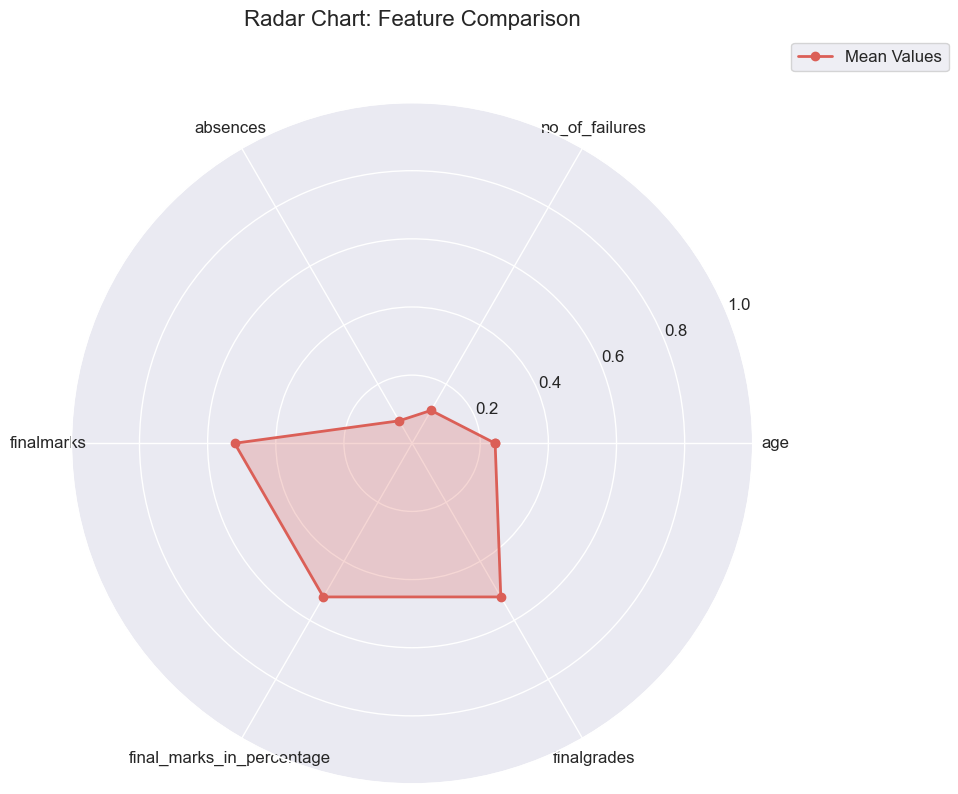

✓ Radar chart complete!


In [70]:
if len(numerical_columns) >= 3:
    # Normalize the data for radar chart
    normalized_df = (df[numerical_columns[:6]] - df[numerical_columns[:6]].min()) / (df[numerical_columns[:6]].max() - df[numerical_columns[:6]].min())
    
    # Take mean values
    values = normalized_df.mean().values
    categories = numerical_columns[:6]
    
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = values.tolist()
    
    # Complete the circle
    values += values[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values, 'o-', linewidth=2, label='Mean Values')
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 1)
    ax.set_title('Radar Chart: Feature Comparison', size=16, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()
    print("✓ Radar chart complete!")

### Polar Plots

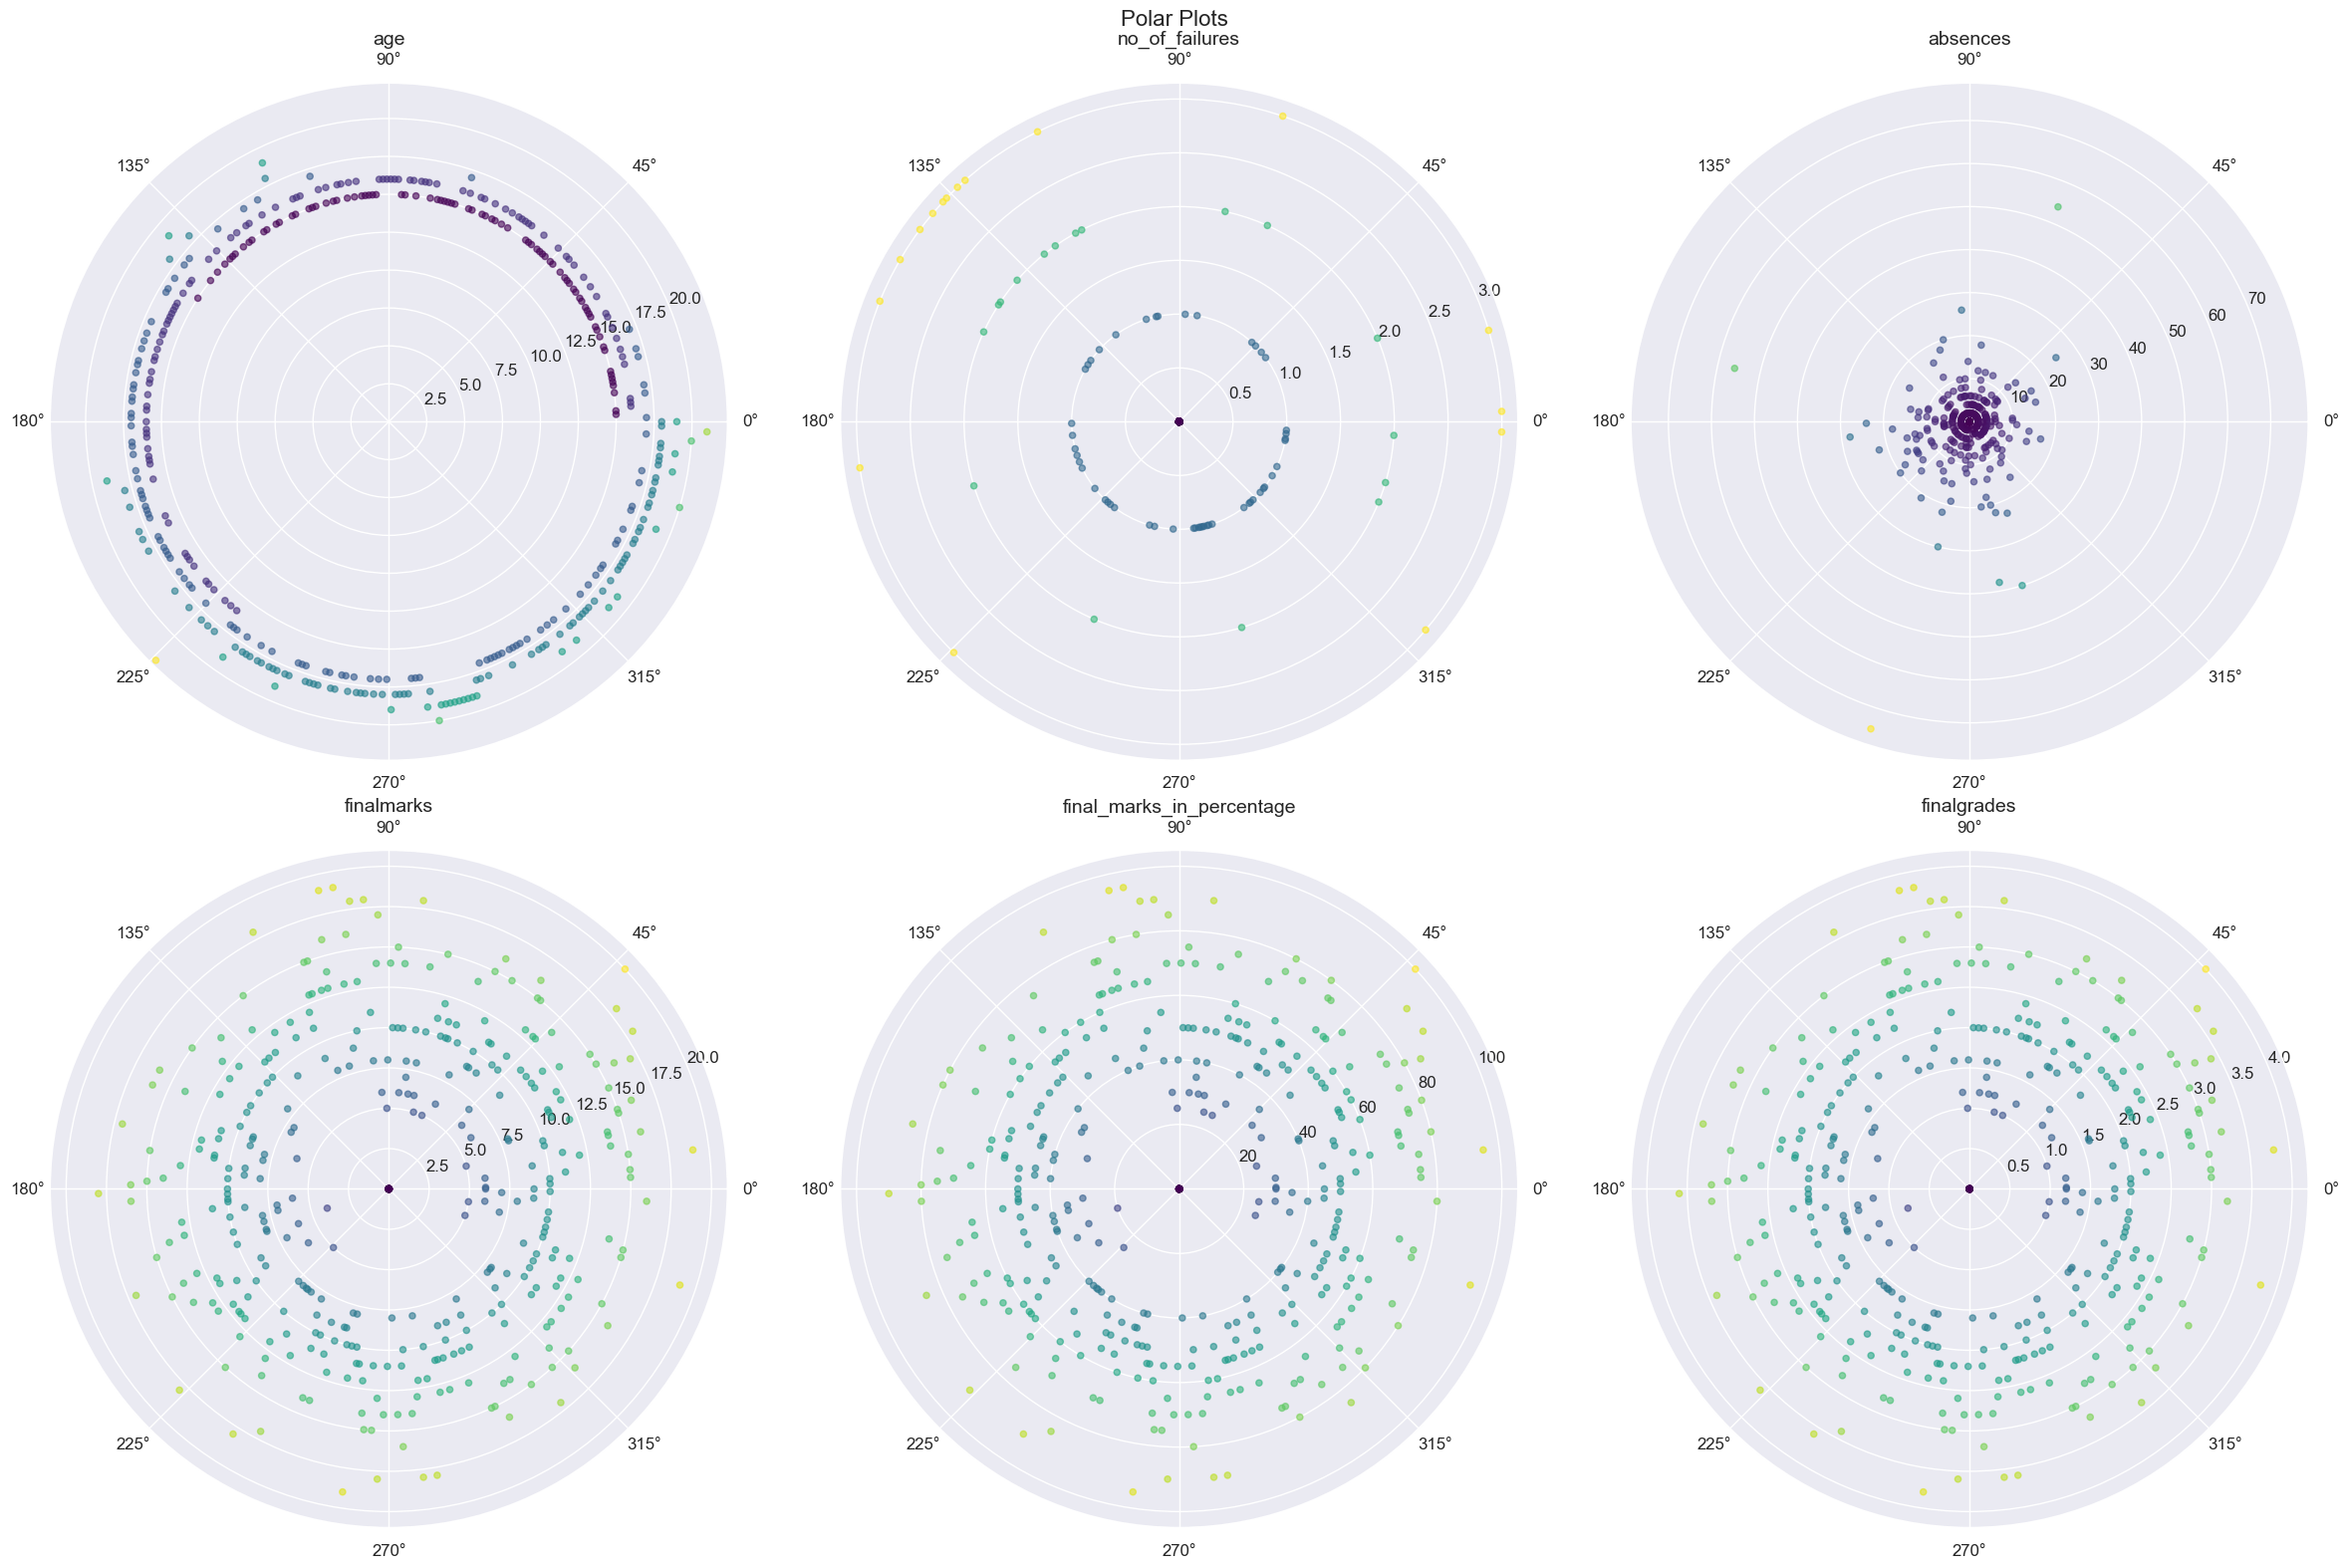

✓ Polar plots complete!


In [71]:
if len(numerical_columns) >= 1:
    n_plots = min(6, len(numerical_columns))
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(8*n_cols, 8*n_rows))
    
    for idx, col in enumerate(numerical_columns[:n_plots]):
        ax = fig.add_subplot(n_rows, n_cols, idx+1, projection='polar')
        
        theta = np.linspace(0, 2 * np.pi, len(df))
        r = df[col].values
        
        # Handle any NaN values
        mask = ~np.isnan(r)
        theta = theta[mask]
        r = r[mask]
        
        ax.scatter(theta, r, c=r, cmap='viridis', s=20, alpha=0.6)
        ax.set_title(f'{col}', size=14)
    
    plt.suptitle('Polar Plots', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()
    print("✓ Polar plots complete!")

### Butterfly Plot

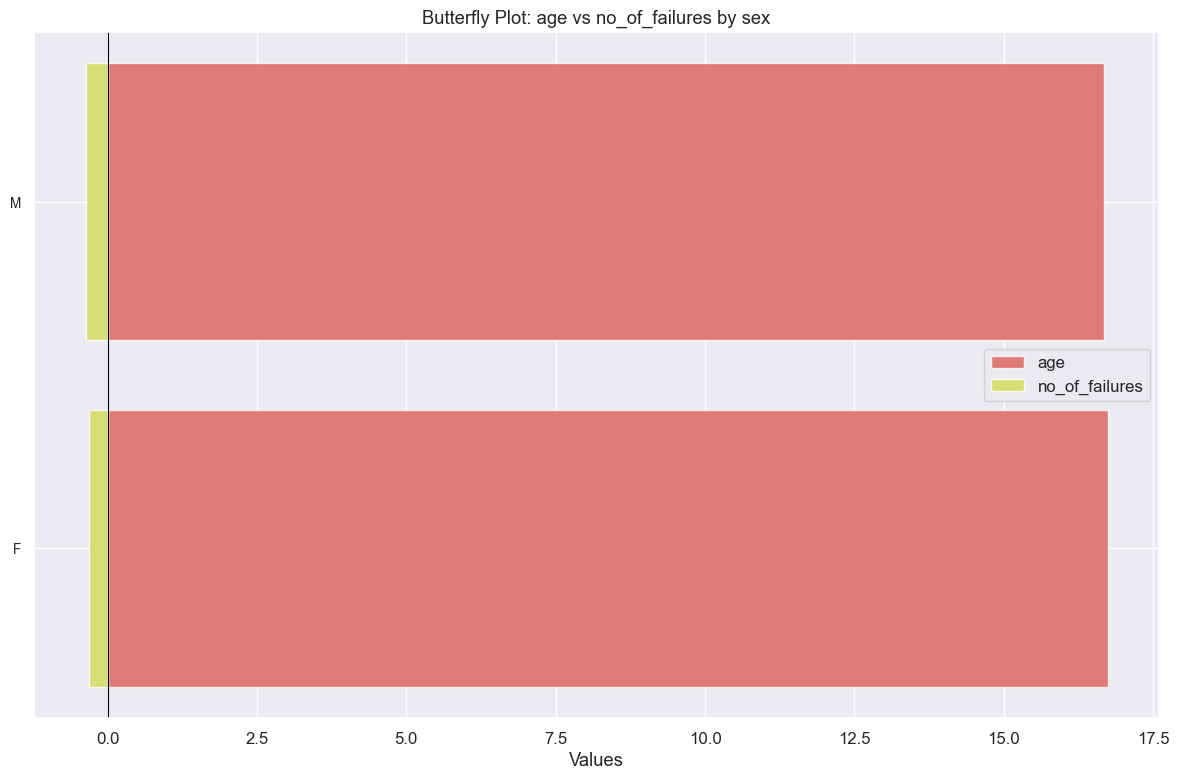

✓ Butterfly plot complete!


In [72]:
if len(categorical_columns) >= 1 and len(numerical_columns) >= 2:
    # Group by categorical variable and get means
    grouped = df.groupby(categorical_columns[0])[[numerical_columns[0], numerical_columns[1]]].mean()
    
    fig, ax = plt.subplots(figsize=(12, max(8, len(grouped) * 0.5)))
    
    y_pos = np.arange(len(grouped))
    
    ax.barh(y_pos, grouped[numerical_columns[0]], align='center', alpha=0.8, label=numerical_columns[0])
    ax.barh(y_pos, -grouped[numerical_columns[1]], align='center', alpha=0.8, label=numerical_columns[1])
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grouped.index, fontsize=max(6, 10 - len(grouped) * 0.1))
    ax.axvline(0, color='black', linewidth=0.8)
    ax.set_xlabel('Values')
    ax.set_title(f'Butterfly Plot: {numerical_columns[0]} vs {numerical_columns[1]} by {categorical_columns[0]}')
    ax.legend()
    plt.tight_layout()
    plt.show()
    print("✓ Butterfly plot complete!")

### Swarm Plots

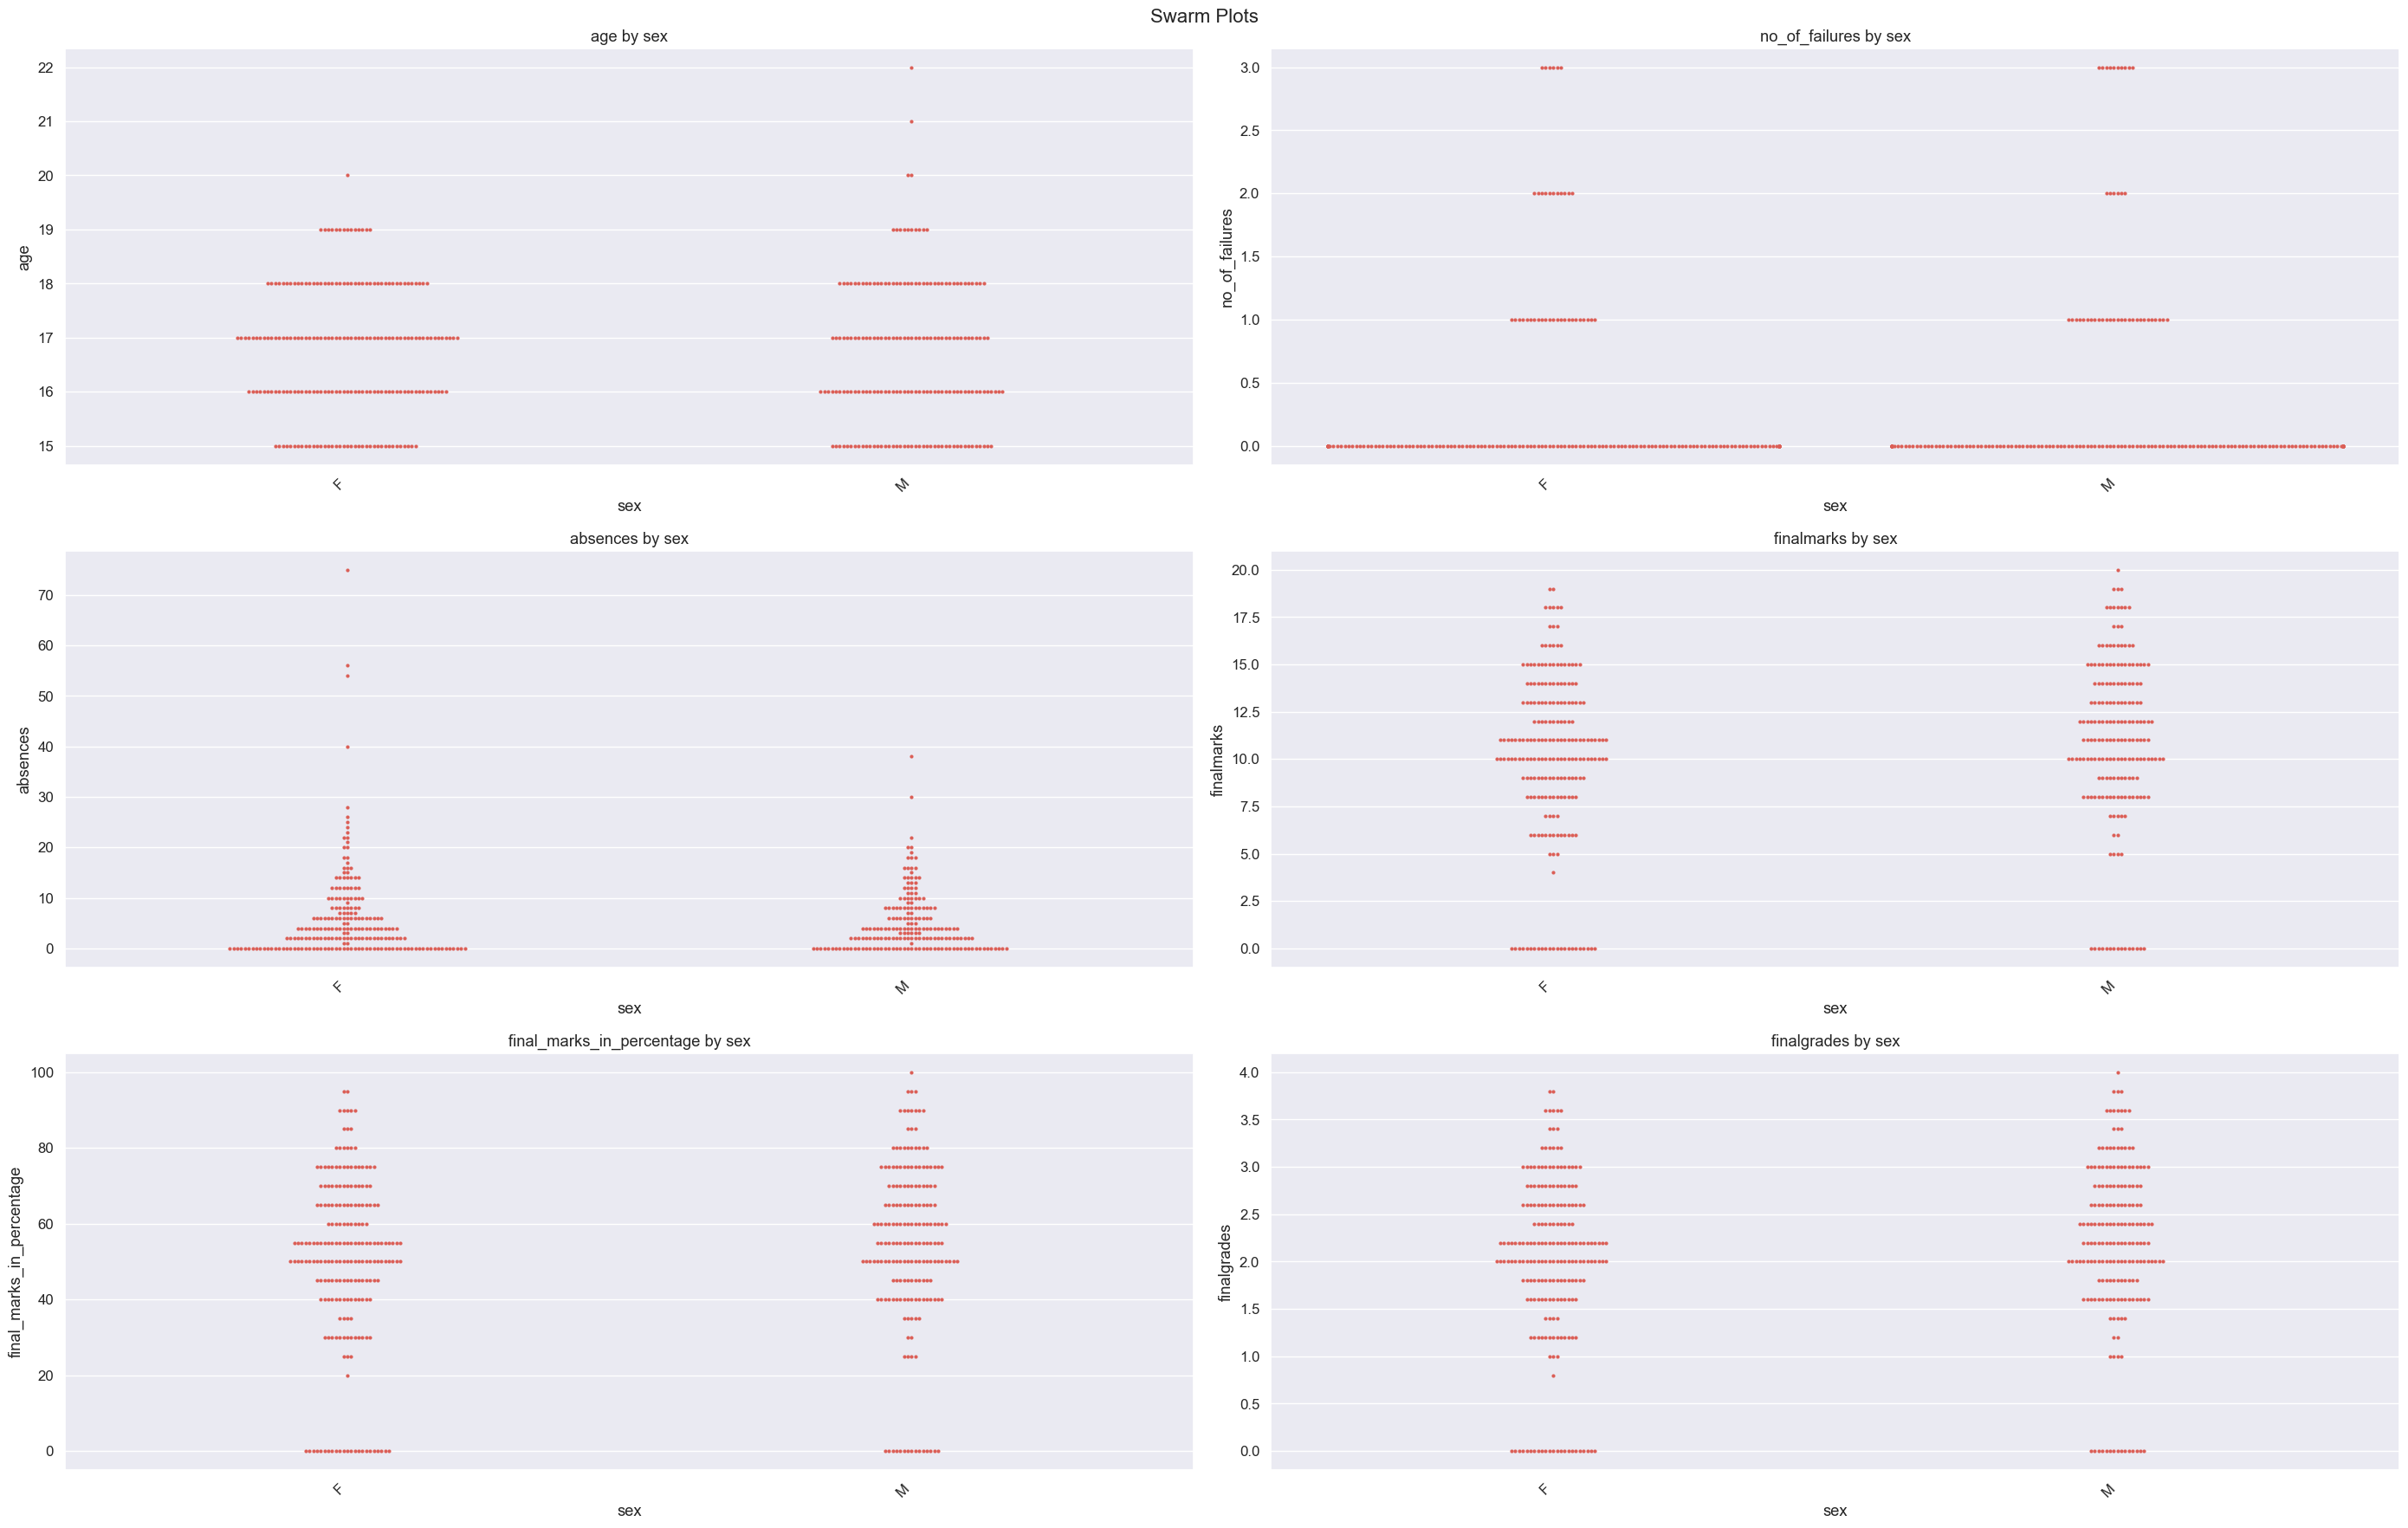

✓ Swarm plots complete!


In [73]:
if len(categorical_columns) >= 1 and len(numerical_columns) >= 1:
    n_plots = min(6, len(numerical_columns))
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14*n_cols, 6*n_rows))
    if n_plots == 1:
        axes = np.array([axes])
    
    axes_flat = axes.flatten()
    
    for idx, col in enumerate(numerical_columns[:n_plots]):
        sns.swarmplot(data=df, x=categorical_columns[0], y=col, size=3, ax=axes_flat[idx])
        axes_flat[idx].set_xticklabels(axes_flat[idx].get_xticklabels(), rotation=45, ha='right')
        axes_flat[idx].set_title(f'{col} by {categorical_columns[0]}')
    
    # Hide empty subplots
    for idx in range(n_plots, len(axes_flat)):
        axes_flat[idx].axis('off')
    
    plt.suptitle('Swarm Plots', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✓ Swarm plots complete!")
    

### Pair Plot


=== Creating Pair Plot ===


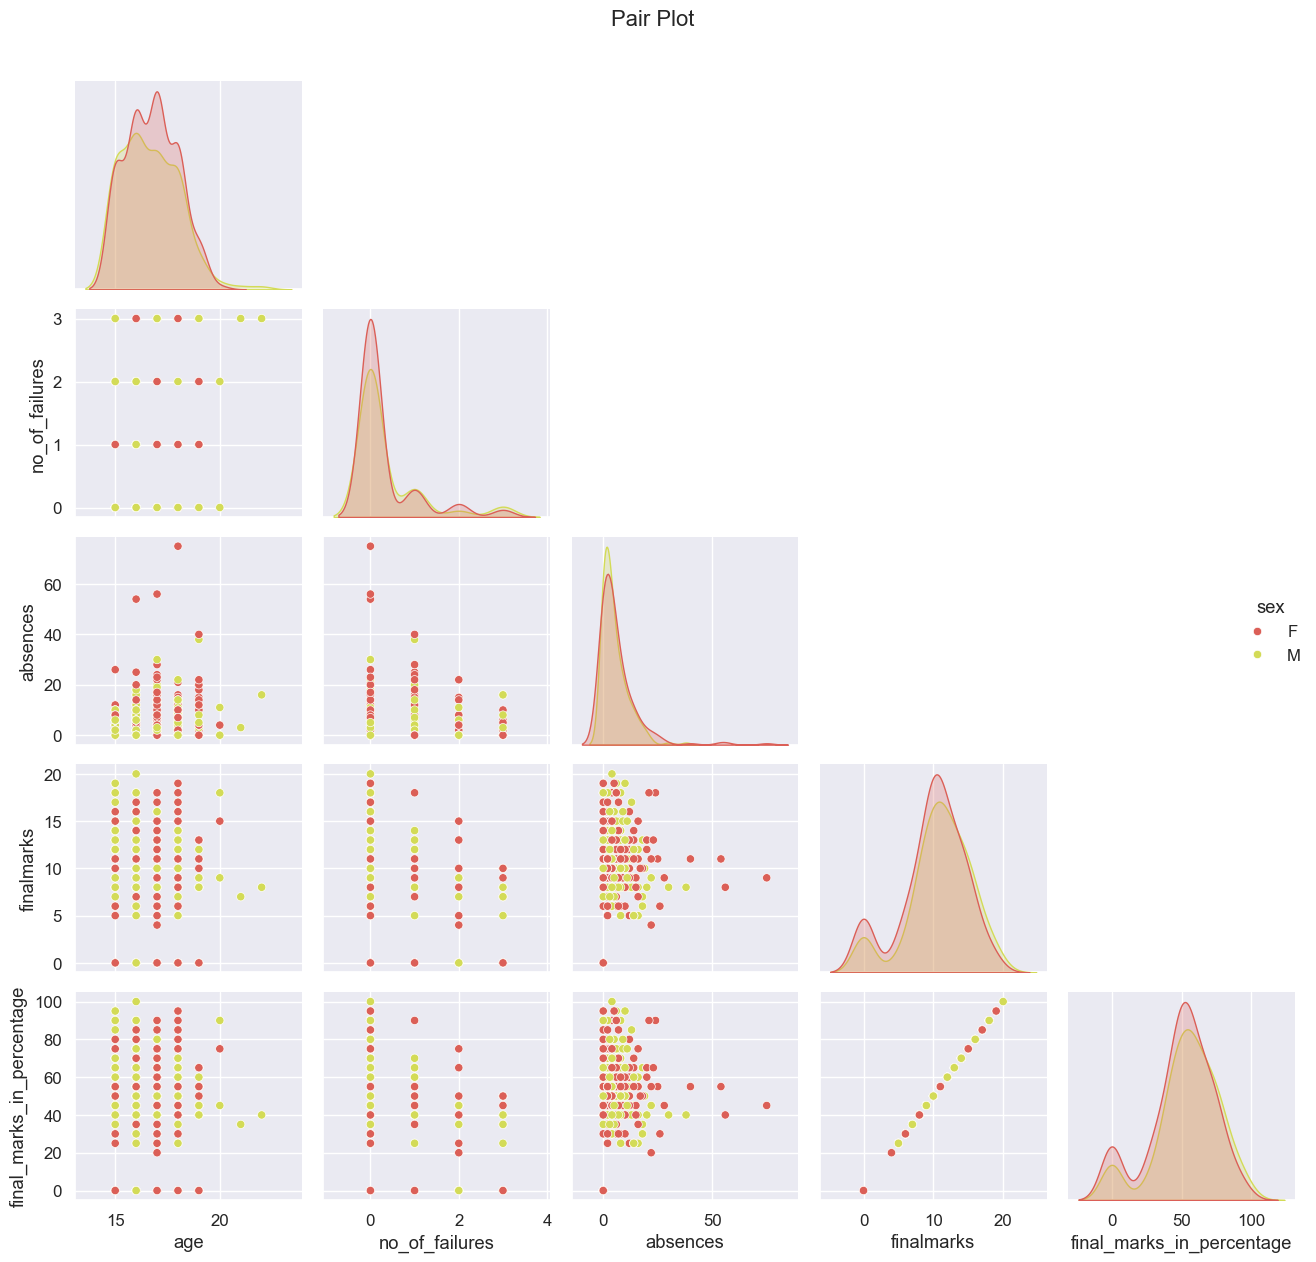

✓ Pair plot complete!


In [74]:
print("\n=== Creating Pair Plot ===")

if len(numerical_columns) >= 2:
    cols_to_plot = list(numerical_columns[:5])  # Ensure it's a list
    
    if len(categorical_columns) > 0:
        top_category = df[categorical_columns[0]].value_counts().head(3).index
        filtered_df = df[df[categorical_columns[0]].isin(top_category)]
        
        # Create list of columns for pair plot
        pairplot_cols = cols_to_plot + [categorical_columns[0]]
        
        sns.pairplot(filtered_df[pairplot_cols], 
                     hue=categorical_columns[0], diag_kind='kde', corner=True)
    else:
        sns.pairplot(df[cols_to_plot], diag_kind='kde', corner=True)
    
    plt.suptitle('Pair Plot', y=1.01)
    plt.tight_layout()
    plt.show()
    print("✓ Pair plot complete!")


### Histogram

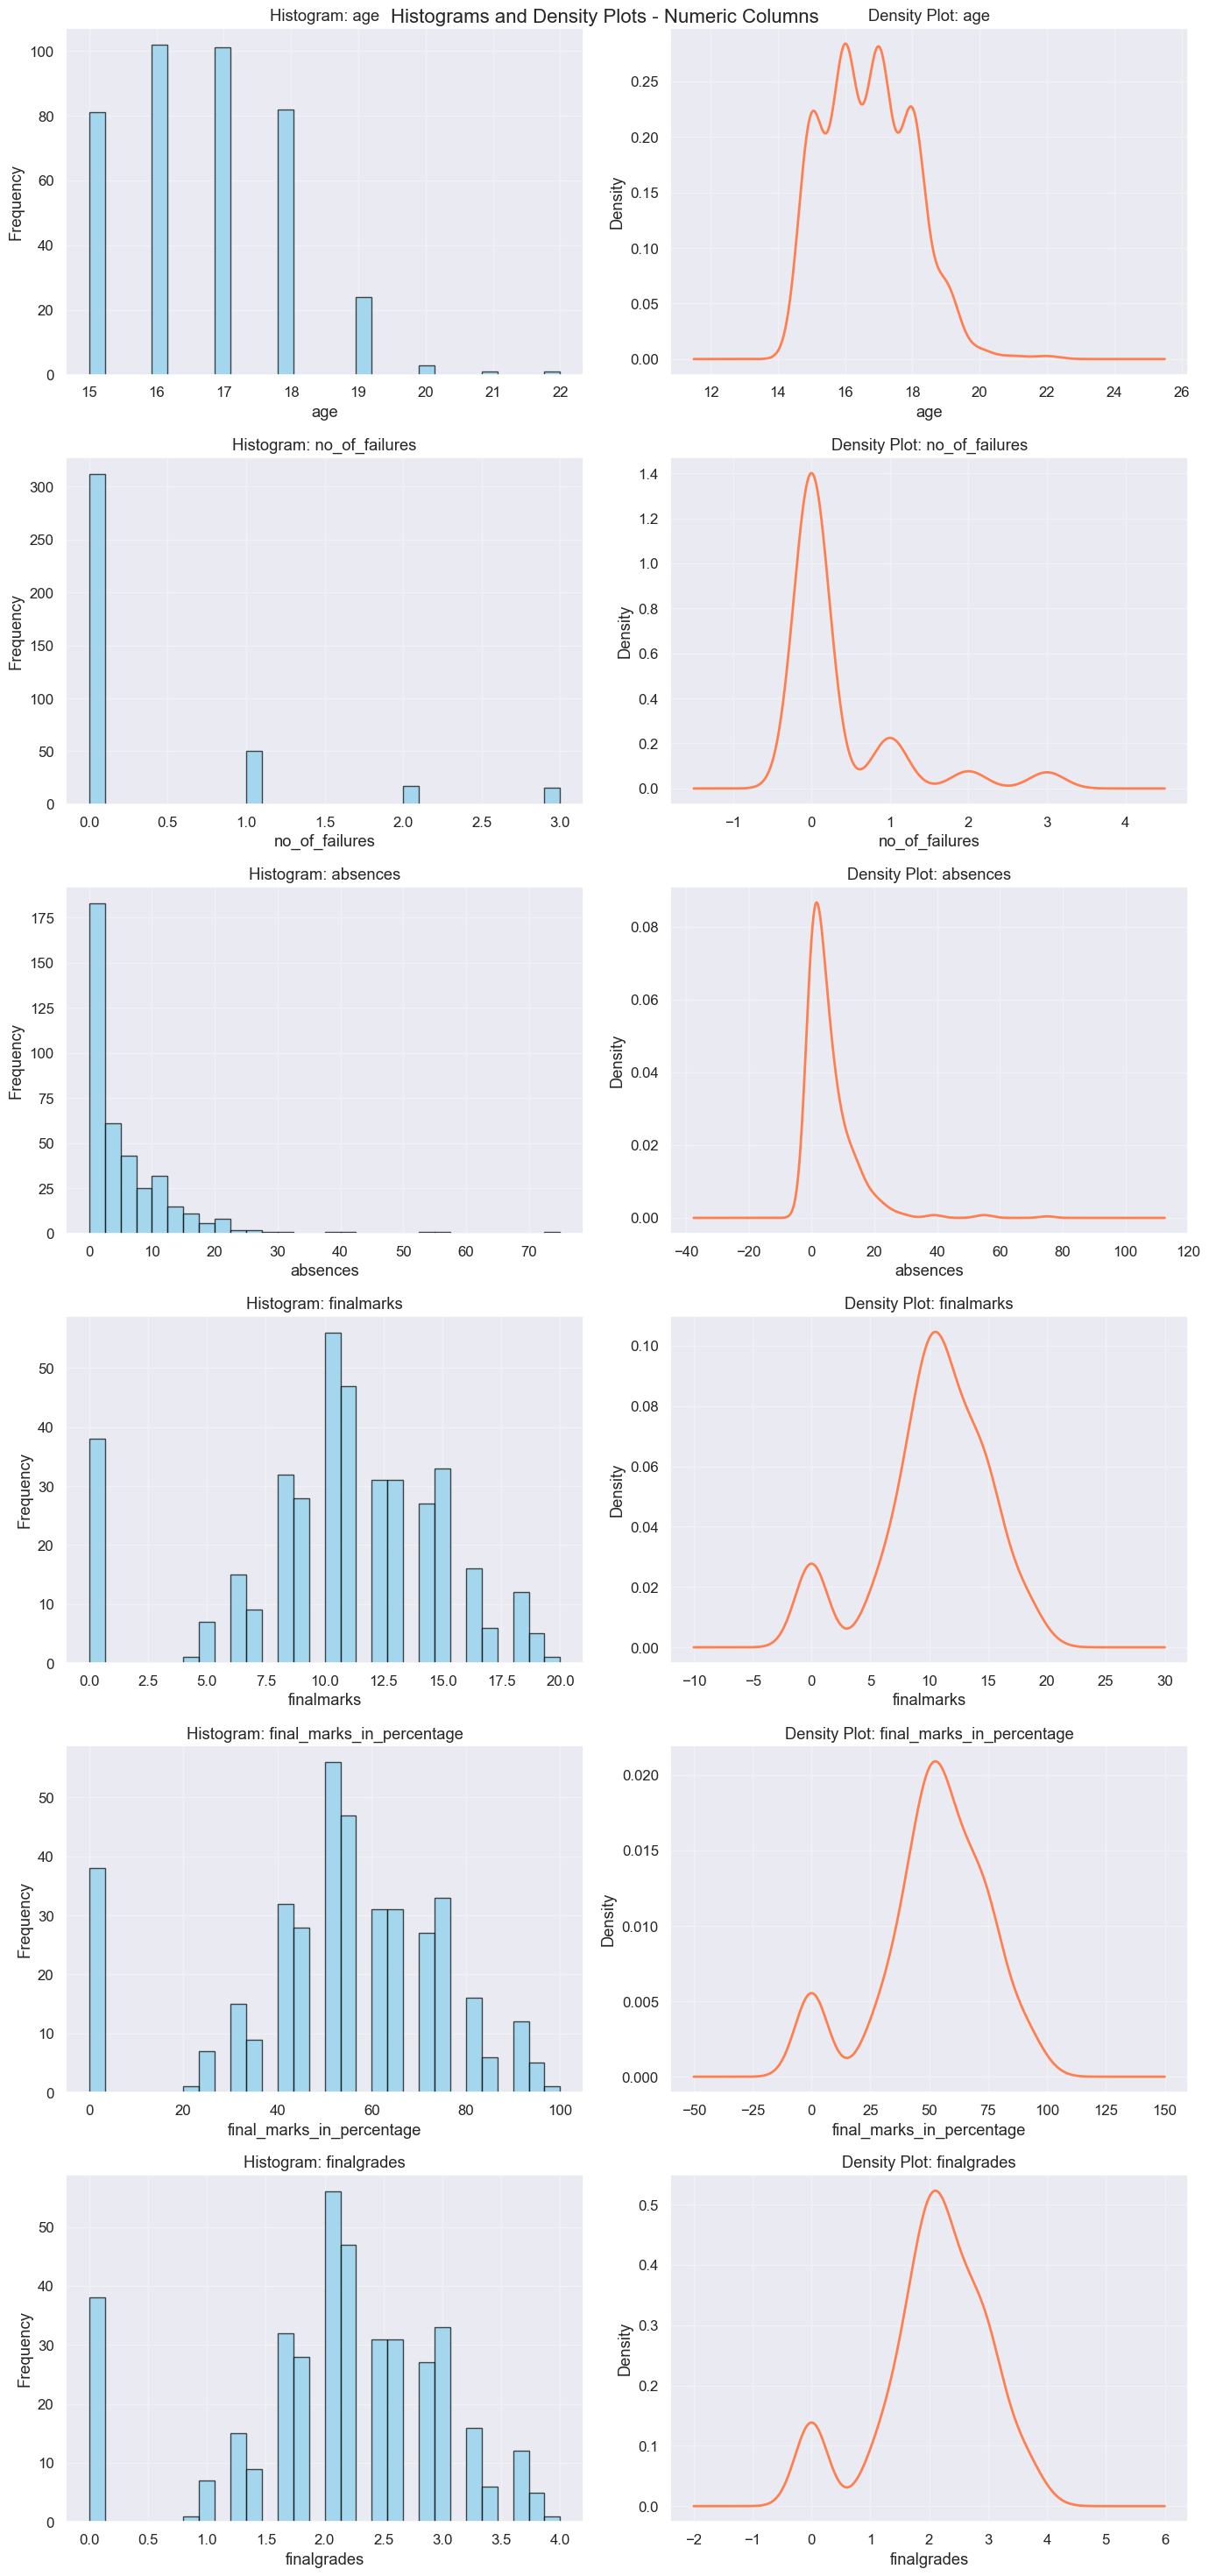

✓ Histograms complete!


In [75]:
if len(numerical_columns) > 0:
    n_cols = 2
    n_rows = len(numerical_columns)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
    if len(numerical_columns) == 1:
        axes = np.array([axes])
    
    axes_flat = axes.reshape(-1, 2)
    
    for idx, col in enumerate(numerical_columns):
        # Histogram
        axes_flat[idx][0].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        axes_flat[idx][0].set_xlabel(col)
        axes_flat[idx][0].set_ylabel('Frequency')
        axes_flat[idx][0].set_title(f'Histogram: {col}')
        axes_flat[idx][0].grid(alpha=0.3)
        
        # Density plot
        df[col].plot(kind='density', ax=axes_flat[idx][1], color='coral', linewidth=2)
        axes_flat[idx][1].set_xlabel(col)
        axes_flat[idx][1].set_ylabel('Density')
        axes_flat[idx][1].set_title(f'Density Plot: {col}')
        axes_flat[idx][1].grid(alpha=0.3)
    
    plt.suptitle('Histograms and Density Plots - Numeric Columns', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✓ Histograms complete!")

### Bar Chart

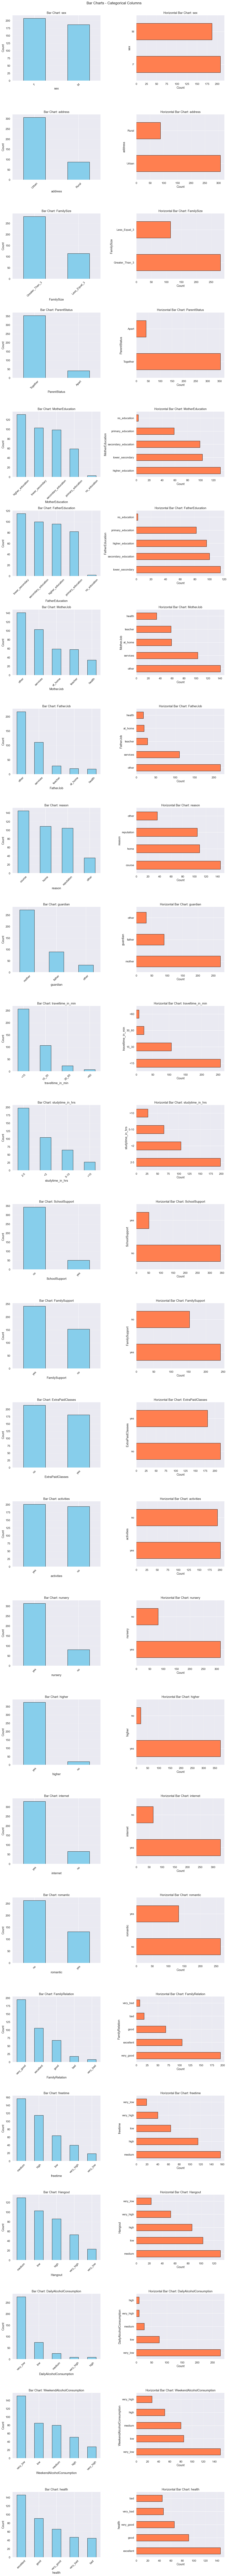

✓ Bar charts complete!


In [76]:
if len(categorical_columns) > 0:
    n_cols = 2
    n_rows = len(categorical_columns)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6*n_rows))
    if len(categorical_columns) == 1:
        axes = np.array([axes])
    
    axes_flat = axes.reshape(-1, 2)
    
    for idx, col in enumerate(categorical_columns):
        value_counts = df[col].value_counts()
        
        # Vertical bar chart
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes_flat[idx][0])
        axes_flat[idx][0].set_xlabel(col)
        axes_flat[idx][0].set_ylabel('Count')
        axes_flat[idx][0].set_title(f'Bar Chart: {col}')
        axes_flat[idx][0].tick_params(axis='x', rotation=45)
        axes_flat[idx][0].grid(alpha=0.3, axis='y')
        
        # Horizontal bar chart
        value_counts.plot(kind='barh', color='coral', edgecolor='black', ax=axes_flat[idx][1])
        axes_flat[idx][1].set_xlabel('Count')
        axes_flat[idx][1].set_ylabel(col)
        axes_flat[idx][1].set_title(f'Horizontal Bar Chart: {col}')
        axes_flat[idx][1].grid(alpha=0.3, axis='x')
    
    plt.suptitle('Bar Charts - Categorical Columns', fontsize=16,y=1)
    plt.tight_layout()
    plt.show()
    print("✓ Bar charts complete!")

### GeoPandas

No lat/lon columns found. Creating sample data around Kathmandu...
Loading world map data...


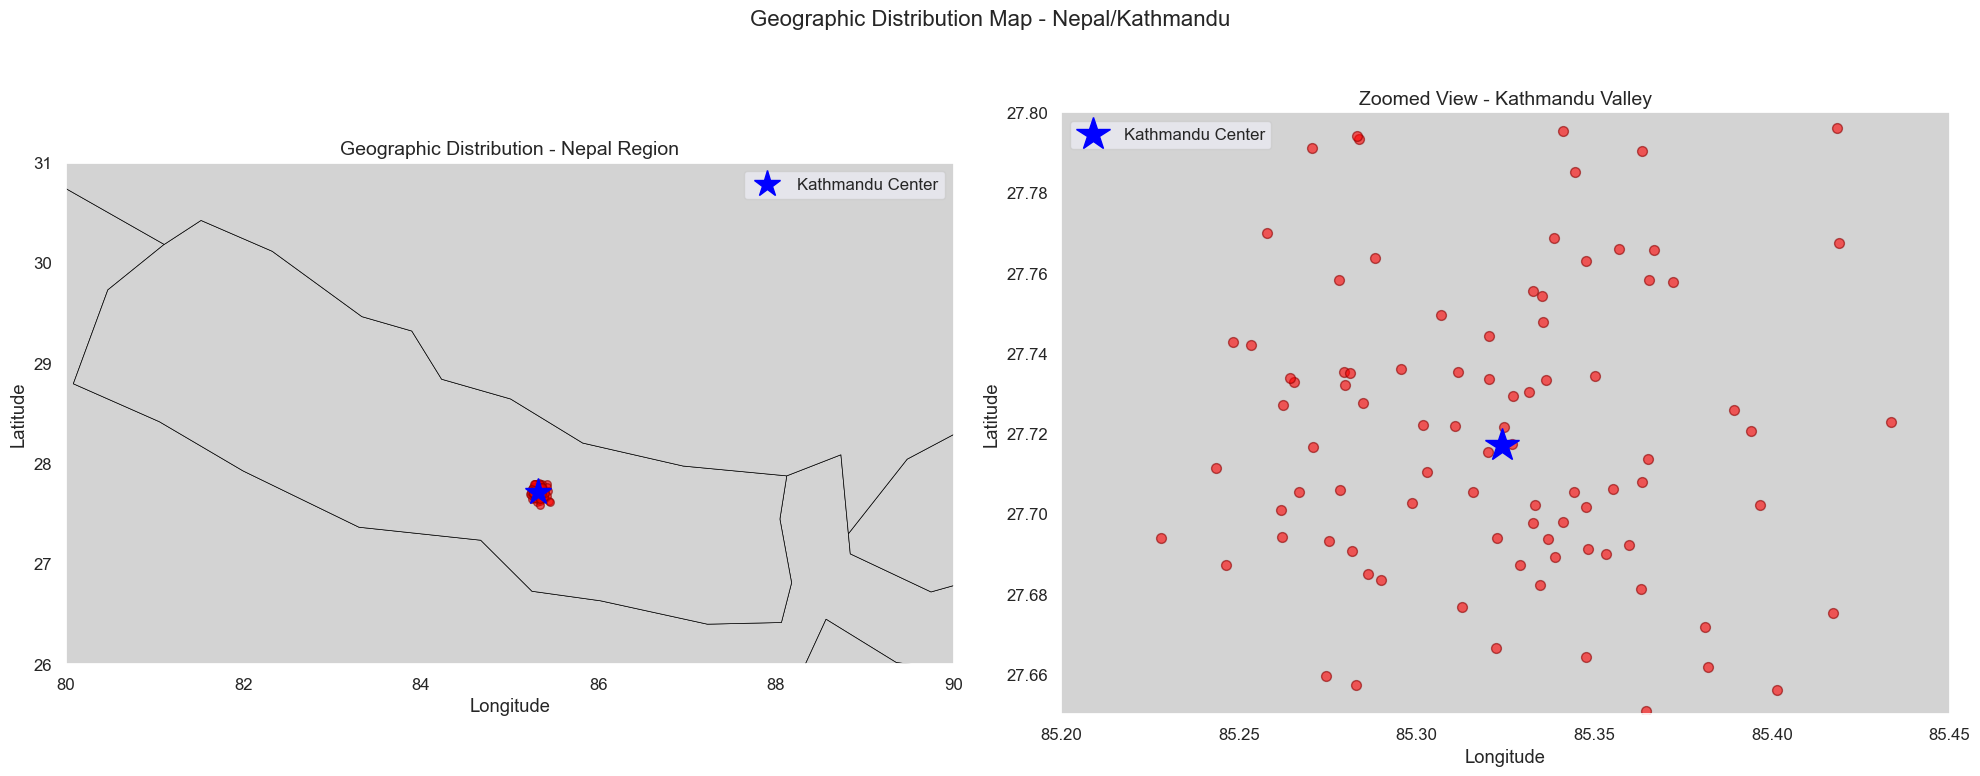

✓ GeoPandas plot complete!
  Total points plotted: 100


In [77]:
try:
    import geopandas as gpd
    from shapely.geometry import Point
    
    # Kathmandu coordinates: approximately 27.7172°N, 85.3240°E
    # Creating sample data points around Kathmandu if your df doesn't have lat/lon
    
    if 'latitude' in df.columns and 'longitude' in df.columns:
        # Use existing latitude/longitude from dataframe
        print("Using latitude/longitude columns from dataframe")
        geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
        gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    else:
        # Create sample points around Kathmandu for demonstration
        print("No lat/lon columns found. Creating sample data around Kathmandu...")
        np.random.seed(42)
        n_points = min(100, len(df))
        
        # Generate random points around Kathmandu (27.7172°N, 85.3240°E)
        sample_lats = 27.7172 + np.random.randn(n_points) * 0.05  # ~5km radius
        sample_lons = 85.3240 + np.random.randn(n_points) * 0.05
        
        geometry = [Point(lon, lat) for lon, lat in zip(sample_lons, sample_lats)]
        gdf = gpd.GeoDataFrame(df.head(n_points), geometry=geometry, crs='EPSG:4326')
    
    # Load world map from Natural Earth (works with newer GeoPandas versions)
    print("Loading world map data...")
    world_url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
    world = gpd.read_file(world_url)
    
    # Filter to show Nepal and surrounding region
    nepal_region = world[world['NAME'].isin(['Nepal', 'India', 'China', 'Bangladesh', 'Bhutan'])]
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Subplot 1: Regional view (Nepal and neighbors)
    nepal_region.plot(ax=axes[0], color='lightgray', edgecolor='black', linewidth=0.5)
    gdf.plot(ax=axes[0], markersize=30, color='red', alpha=0.6, edgecolor='darkred')
    axes[0].set_xlim(80, 90)  # Focus on Nepal region
    axes[0].set_ylim(26, 31)
    axes[0].set_title('Geographic Distribution - Nepal Region', fontsize=14)
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].grid(True, alpha=0.3)
    
    # Add Kathmandu marker
    axes[0].plot(85.3240, 27.7172, 'b*', markersize=20, label='Kathmandu Center')
    axes[0].legend()
    
    # Subplot 2: Zoomed view (Kathmandu valley)
    nepal_region.plot(ax=axes[1], color='lightgray', edgecolor='black', linewidth=0.5)
    gdf.plot(ax=axes[1], markersize=50, color='red', alpha=0.6, edgecolor='darkred')
    axes[1].set_xlim(85.2, 85.45)  # Kathmandu valley
    axes[1].set_ylim(27.65, 27.8)
    axes[1].set_title('Zoomed View - Kathmandu Valley', fontsize=14)
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].grid(True, alpha=0.3)
    
    # Add Kathmandu marker
    axes[1].plot(85.3240, 27.7172, 'b*', markersize=25, label='Kathmandu Center')
    axes[1].legend()
    
    plt.suptitle('Geographic Distribution Map - Nepal/Kathmandu', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✓ GeoPandas plot complete!")
    print(f"  Total points plotted: {len(gdf)}")
    
except ImportError as e:
    print("GeoPandas not installed. Install with: pip install geopandas")
    print(f"Error: {e}")
except Exception as e:
    print(f"Geographic plot error: {e}")
    print("Trying alternative approach...")
    
    try:
        # Alternative: Simple plot without background map
        import geopandas as gpd
        from shapely.geometry import Point
        
        if 'latitude' not in df.columns or 'longitude' not in df.columns:
            print("Creating sample data around Kathmandu...")
            np.random.seed(42)
            n_points = min(100, len(df))
            sample_lats = 27.7172 + np.random.randn(n_points) * 0.05
            sample_lons = 85.3240 + np.random.randn(n_points) * 0.05
        else:
            sample_lats = df['latitude'].values
            sample_lons = df['longitude'].values
            n_points = len(df)
        
        # Simple scatter plot with Nepal outline approximation
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Plot data points
        ax.scatter(sample_lons, sample_lats, c='red', s=50, alpha=0.6, 
                  edgecolors='darkred', linewidth=1, label='Data Points')
        
        # Add Kathmandu center
        ax.plot(85.3240, 27.7172, 'b*', markersize=30, label='Kathmandu Center', 
               markeredgecolor='darkblue', markeredgewidth=2)
        
        # Draw approximate Nepal boundary box
        nepal_box_lon = [80.05, 88.20, 88.20, 80.05, 80.05]
        nepal_box_lat = [26.35, 26.35, 30.45, 30.45, 26.35]
        ax.plot(nepal_box_lon, nepal_box_lat, 'k--', linewidth=2, label='Nepal (approx)')
        
        ax.set_xlim(85.0, 85.6)  # Focus on Kathmandu region
        ax.set_ylim(27.5, 27.9)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        ax.set_title('Geographic Distribution - Kathmandu Region', fontsize=16)
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        print("✓ Simple geographic plot complete!")
        print(f"  Total points plotted: {n_points}")
        
    except Exception as e2:
        print(f"Alternative plot also failed: {e2}")